### Table of Contents

1. [Prediction Prototype Algorithm](#PredictionPrototypeAlgorithm)
2. [Utility Functions](#UtilityFunctions) 
3. [Creating Data Frames for Already Processed DataSets](#CreatingDataFramesforAlreadyProcessedDataSets) 
4. [Covid_19_Countires_Wise Analysis](#Covid_19_Countires_Wise_Analysis)
    - 4.1 [Data Preprocessing](#DataPreprocessing)
    - 4.2 [Creating Time Series model](#CreatingTimeSeriesmodel)
    - 4.3 [Visualize Covid-19 Time Series Predictions](#VisualizeCovid19TimeSeriesPredictions)
    - 4.4 [Prediction Prototype Algorithm](#PredictionPrototypeAlgorithm)
    - 4.5 [Covid 19 Data Frame Generated by Time Series Model](#Covid19DataFrameGeneratedbyTimeSeriesModel)
    - 4.6 [Selecting the population of the countries under consideration](#Selectingthepopulationofthecountriesunderconsideration)
    - 4.7 [Normalising covid data with population  ](#Normalisingcoviddatawithpopulation )
    - 4.8 [Covid-19 Clusters Plot](#Covid19ClustersPlot)
    - 4.9 [Labeling Criterion for Covid Data ](#LabelingCriterionforCovidData)
5. [Population data based on classification of Age groups](#PopulationdatabasedonclassificationofAgegroups)
    - 5.1 [Age groups Classification Clusters Plot](#AgegroupsClassificationClustersPlot)
    - 5.2 [Cluste Labeling :- Age groups](#ClusteLabelingAgegroups)
6. [Co-morbidities Dataframe Clustering](#ComorbiditiesDataframeClustering)
    - 6.1 [HIVs](#HIV)
     - 6.1.1 [HIV Cluster Plot](#HHIVClusterPlot)
     - 6.1.2 [Cluste Labeling :- HIV Cases](#ClusteLabelingHIVCases)
    - 6.2 [Blood Pressure](#BloodPressure)
     - 6.2.1 [Blood Pressure Cluster Plot](#BloodPressureClusterPlot)
     - 6.2.2 [Cluste Labeling :- Blood Pressure Cases](#ClusteLabelingBloodPressureCases)
    - 6.3 [Diabetes](#Diabetes)
     - 6.3.1 [Diabetes Cluster Plot](#DiabetesPlot)
     - 6.3.2 [Cluste Labeling :- Diabetes Cases](#ClusteLabelingDiabetesCases)
    - 6.4 [Tuber Culosis](#TuberCulosis)
     - 6.4.1 [Tuber Culosis Cluster Plot](#TuberCulosisClusterPlot)
    - 6.5 [Medical Expending](#MedicalExpending)
     - 6.5.1 [Medical Expending Cluster Plot](#MedicalExpendingClusterPlot)
     - 6.5.2 [Cluste Labeling :- Medical Expending](#ClusteLabelingMedicalExpending)
7. [Listing all the Clusters of Comorbidites](#ListingalltheClustersofComorbidites)
8. [Main Cluster for Prediction](#MainClusterforPrediction)
    - 8.1 [Main Mega Frame Formation](#MainMegaFrameFormation)
    - 8.2 [Ensuring Clusters Uniformity](#EnsuringClustersUniformity)
    - 8.3 [Main Cluster Plot](#MainClusterPlot)
    - 8.4 [Cluste Labeling :- Main Cluster](#ClusteLabelingMainCluster)
9. [Preparing Data for Deep Net Model](#PreparingDataforDeepNetModel)
    - 9.1 [Deep Net Model](#DeepNetModel)
10. [Vaccine Dosage Prediction](#VaccineDosagePrediction)
    - 10.1 [Minimum Covid Vaccine Required Plot](#MinimumCovidVaccineRequiredPlot)
    - 10.2 [Minimum Percentage Vaccine Required Plot](#MinimumPercentageVaccineRequiredPlot)
    - 10.3 [Countries Covid Vulnerability Status Plot](#CountriesCovidVulnerabilityStatusPlot)
11. [Discussion](#discuss)
    

# Prediction Prototype Algorithm
<a class="anchor" id="PredictionPrototypeAlgorithm"></a>

In [1]:
## To Enable Verbos Mode set Verbose to True
Verbose = True
Debug = True

In [2]:
## Importing important libraries

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=30)
matplotlib.rcParams.update({'font.size': 28})
from mpl_toolkits.mplot3d import Axes3D
import math
import datetime as dt
import os
import sys

## ML Models import
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import linear_model
from sklearn.decomposition import PCA

## Deep net model Pytorch module import
import torch
from torch import nn
import torch.nn.functional as F
from torch import optim

In [3]:
## PCA Decomposition Configuration
pca = PCA(n_components=2)

## Utility Functions
<a class="anchor" id="UtilityFunctions"></a>

In [4]:

## Visulalization function 
def Visualize(dataset,List_of_count_to_print,title1,ylab,vx=50,vy=30,w=.80):
    df = dataset
    n = 0
    for i in List_of_count_to_print:
        filter1 = df['Country'] == i
        df = df[filter1]
        labels = df['Date']
        conf = df['Confirmed']
        Recov = df['Recovered']
        Death = df['Deaths']
        
        #high = max(conf)
        #low = min(conf)
        
        x = np.arange(len(labels))  # the x label locations 
        width = w  # the width of the bars
        fig, ax = plt.subplots(figsize=(vx,vy))
        rects1 = ax.bar(x - width, conf, width, label='confirmed')
        rects2 = ax.bar(x , Recov, width, label='Recovered')
        rects3 = ax.bar(x + width , Death, width, label='Death')

        # Add some text for labels, title and custom x-axis tick labels, etc.
        ax.set_ylabel(ylab)
        ax.set_title(title1)
        ax.set_xticks(x)
        plt.xticks(rotation=90) 
        #plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])
        ax.set_xticklabels(labels)
        ax.legend()
        n  = n + 1
    
    
    plt.show()
    
## function to Check the List of Countries avaialable
def count_avalaible(dataframe,country_coul_rep = 'Country'):
    x = 0
    for i in set(dataframe.loc[:,country_coul_rep]):
        print(i,end=' | ')
        x = x + 1
        if(x > 6):
            x = 0
            print()
    print("\n\n##Total No of Countries = " + str(len(set(dataframe.loc[:,country_coul_rep]))))
    
    
## Function for Cluster Plotting 

def plot_cluster(data_frame,title,xlabel,ylabel):
    g1x = []
    g1y = []
    g2x = []
    g2y = []
    g3x = []
    g3y = []
    g4x = []
    g4y = []
    g5x = []
    g5y = []
    g6x = []
    g6y = []
    g7x = []
    g7y = []
    g8x = []
    g8y = []
    g9x = []
    g9y = []
    g10x = []
    g10y = []

    for i,j,k in data_frame:
        if(k == 0):
            g1x.append(i)
            g1y.append(j)
        elif(k==1):
            g2x.append(i)
            g2y.append(j)
        elif(k==2):
            g3x.append(i)
            g3y.append(j)
        elif(k==3):
            g4x.append(i)
            g4y.append(j)
        elif(k==4):
            g5x.append(i)
            g5y.append(j)
        elif(k==5):
            g6x.append(i)
            g6y.append(j)
        elif(k==6):
            g7x.append(i)
            g7y.append(j)
        elif(k==7):
            g8x.append(i)
            g8y.append(j)
        elif(k==8):
            g9x.append(i)
            g9y.append(j)
        elif(k==9):
            g10x.append(i)
            g10y.append(j)



    data = [(g1x,g1y), (g2x,g2y), (g3x,g3y), (g4x,g4y), (g5x,g5y), (g6x,g6y), (g7x,g7y), (g8x,g8y), (g9x,g9y), (g10x,g10y)]
    colors = ("red", "green", "blue","orange","purple","black","magenta","cyan","gold","cadetblue")
    groups = ("Cluster1", "Cluster2", "Cluster3","Cluster4","Cluster5","Cluster6","Cluster7","Cluster8","Cluster9","Cluster10")
    
    ## Testing the number of clusters to be ploted
    no_of_cluster = 0
    for i in data:
        if(len(i[0]) == 0):
            break
        no_of_cluster += 1
    # Create plot
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, facecolor = "1.0")

    for data, color, group in zip(data, colors[:no_of_cluster], groups[:no_of_cluster]):
        print(data)
        t = data
        x , y = t
        ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=100, label=group)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.title(title)
    plt.legend(prop={"size":10}, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
    
    
def plot_cluster_3d(data_frame,title,xlabel,ylabel,zlabel):
    
    a = []
    b = []
    c = []
    d = []
    
    for i in data_frame:
        a.append(i[0][0])
        b.append(i[1][0])
        c.append(i[2][0])
        d.append(i[3])
        
    data = pd.DataFrame()
    
    data['val1'] = a
    data['val2'] = b
    data['val3'] = c
    data['cluster'] = d
    
    colors = ["red", "green", "blue","yellow","purple","black","magenta","cyan"]
    groups = ["Sever1", "Sever2", "Sever3","Sever4","Sever5","Sever6","Sever7","Sever8"]
    
    for i in range(1,len(data)):
        print(data.iloc[i])
    
    
    # Create plot
    fig = plt.figure()
    ax = fig.add_subplot(111,projection='3d')
    #ax = Axes3D(fig)
    
    print(data)
    
    x = np.array(data['val1'])
    y = np.array(data['val2'])
    z = np.array(data['val3'])
    
    ax.scatter(x,y,z, marker="s", c='red', edgecolors='none', s=100, label=groups) #,cmap="RdBu")

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)
    plt.title(title)
    plt.legend(loc=2,prop={"size":10})
    plt.show()
    
    

In [5]:
import pandas as pd
import torch
from torch.utils.data import Dataset
from sklearn.preprocessing import StandardScaler


class CSVDataset(Dataset):
    # load the dataset
    def __init__(self, file_name):
        # store the inputs and outputs

        file_out = pd.read_csv(file_name)
        self.X = file_out.values
        self.Y = file_out.values

        # Scaling the features
        sc = StandardScaler()
        x_train = sc.fit_transform(self.X)
        y_train = self.Y

        self.x_train = torch.tensor(x_train , dtype=torch.float32)
        self.y_train = torch.tensor(y_train)

    # number of rows in the dataset
    def __len__(self):
        return len(self.X)

    # get a row at an index
    def __getitem__(self, idx):
        return [self.x_train[idx], self.y_train[idx]]

In [6]:
# Function to transform Dataframes from [Values] to Values

def transformDataframe(data):
    column_heading = list(data.columns)
    for i in range(len(column_heading)):
        if((str(type(data[column_heading[i]][0])) == "<class 'numpy.int32'>") or (str(type(data[column_heading[i]][0])) == "<class 'int'>")):
            column_heading.remove(column_heading[i])
    for k in column_heading:
        for i in data.index: 
            data[k][i] = float(data[k][i][0])
    return data

In [7]:
def auto_labeler(data,pos_neg_vector):
    
    clus_labels = ["Sever-1","Sever-2","Sever-3","Sever-4","Sever-5","Seve-6","Sever-7","Sever-8","Sever-9","Sever-10"]
    
    data = transformDataframe(data) ## Trasnforming data frame
    
    
    ## Calculating means for different cluster values
    clus_count = len(set(data['cluster']))
    Clus_vals = []
    Clus_final_score = []
    for i in range(clus_count):Clus_vals.append(list(data[data['cluster'] == i].mean()))
    print("Cluster Mean Values " + str(Clus_vals))
    
    
    print(len(Clus_vals[0]) - 1)
    
    for j in range(clus_count):
        temp_value = 0
        for i in range(len(Clus_vals[0]) - 1):                                # -1 is done so that we dont consider cluster column
            temp_value = temp_value + (float(pos_neg_vector[i]) * Clus_vals[j][i])
        Clus_final_score.append(temp_value)
    
    print("Final Cumlative Cluster Scores" + str(Clus_final_score))
    
    Decison_Clus = Clus_final_score.copy()
    
    Decison_Clus.sort()
    
    print("Final Cumlative Cluster Scores sorted " + str(Decison_Clus))
    
    result_lis = []
    
    for i in Decison_Clus:
        for j in range(len(Clus_final_score)):
            if(i == Clus_final_score[j]):
                result_lis.append(j)
                break
    
    print("Labeled Cluster:- " + str(result_lis))
    result = []
    for i in result_lis:
        result.append([i,clus_labels[i]])
        
    # Output Generator
    print("\033[1m" + "\nCluster Auto Labeling \n" + "\033[1m")
    for i in range(len(result_lis)):
        print("\033[1m" + "Cluster " + str(result_lis[i])  + " ------> " + clus_labels[i] +  "Susceptibility" + "\033[1m")
        print("\n")
        
        
    return result,result_lis
                
                
    
    
        
        
    
        
    
    

In [159]:
# Auto Weight Generations 
labeled_clus_pop

def auto_weight_gen(clus_data):
    length = len(clus_data)
    final_weight_list = []
    weight_list = []
    for i in range(length):
        weight_list.append(i/(length-1))
#         final_weight_list.append(0)
    for i in range(len(clus_data)):
        final_weight_list.append(weight_list[clus_data.index(i)])
    print(final_weight_list)    
    return final_weight_list
        
#auto_weight_gen(labeled_clus_pop) 

def auto_cluster_label(clus_data):
    length = len(clus_data)
    final_weight_list = []
    weight_list = []
    for i in range(length):
        weight_list.append(i)
    for i in range(len(clus_data)):
        final_weight_list.append(weight_list[clus_data.index(i)])
    print(final_weight_list)    
    return final_weight_list

# Creating Data Frames for Already Processed DataSets
<a class="anchor" id="CreatingDataFramesforAlreadyProcessedDataSets"></a>

In [8]:
Covid_19_Countires_Wise = pd.read_csv('../../Covid-19-Data(selected-dataset)/countries-aggregated.csv')
Blood_Pressure_Countires_Wise = pd.read_csv('../Pre_Processed_Data/Blood_Pressure_Countires_Wise_Processed.csv')
Diabetes_Countires_Wise = pd.read_csv('../Pre_Processed_Data/Diabetes_Countires_Wise_Processed.csv')
HIV_Countires_Wise = pd.read_csv('../Pre_Processed_Data/HIV_Countires_Wise_Processed.csv')
Medical_Expending_Countires_Wise = pd.read_csv('../Pre_Processed_Data/Medical_Expending_Countires_Wise_Processed.csv')
Population_Data_Countires_Wise = pd.read_csv('../Pre_Processed_Data/Population_Data_Countires_Wise_Processed.csv')
Population_Data_Countires_Wise_Descreet = pd.read_csv('../Pre_Processed_Data/Population_Data_Countires_Wise_Descreet_Processed.csv')
Tuber_Culosis_Countires_Wise = pd.read_csv('../Pre_Processed_Data/Tuber_Culosis_Countires_Wise_Processed.csv')
Population_Data_Age_Wise = pd.read_csv('../Pre_Processed_Data/Population_Data_Age_Wise.csv')
## Removing extra Unnamed:0 columns created during file storage 

Blood_Pressure_Countires_Wise = Blood_Pressure_Countires_Wise.drop(['Unnamed: 0'],axis=1)
Diabetes_Countires_Wise = Diabetes_Countires_Wise.drop(['Unnamed: 0'],axis=1)
HIV_Countires_Wise = HIV_Countires_Wise.drop(['Unnamed: 0'],axis=1)
Medical_Expending_Countires_Wise = Medical_Expending_Countires_Wise.drop(['Unnamed: 0'],axis=1)
Population_Data_Countires_Wise = Population_Data_Countires_Wise.drop(['Unnamed: 0'],axis=1)
Tuber_Culosis_Countires_Wise = Tuber_Culosis_Countires_Wise.drop(['Unnamed: 0'],axis=1)
Population_Data_Countires_Wise_Descreet = Population_Data_Countires_Wise_Descreet.drop(['Unnamed: 0'],axis=1)
Population_Data_Age_Wise = Population_Data_Age_Wise.drop(['Unnamed: 0'],axis=1)


## 1. Covid_19_Countires_Wise Analysis
<a class="anchor" id="Covid_19_Countires_Wise_Analysis"></a>

## Data Preprocessing
<a class="anchor" id="DataPreprocessing"></a>

In [9]:
#Covid_19_Countires_Wise = Covid_19_Countires_Wise.drop([length-1])
Covid_19_Countires_Wise.fillna(0)
# if Verbose:
#     Covid_19_Countires_Wise

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0
...,...,...,...,...,...
78715,2021-03-02,Zimbabwe,36148,32989,1472
78716,2021-03-03,Zimbabwe,36179,33392,1478
78717,2021-03-04,Zimbabwe,36223,33632,1483
78718,2021-03-05,Zimbabwe,36248,33759,1484


In [10]:
data = np.array(Covid_19_Countires_Wise)
date_range = data[:,0]
Country_name = data[:,1]
time_series_data = data[:,[2,3,4]]

if Verbose:
    print(time_series_data)

Xs = time_series_data

n = len(set(list(data[:,0])))
if Verbose:
    print(n)

[[0 0 0]
 [0 0 0]
 [0 0 0]
 ...
 [36223 33632 1483]
 [36248 33759 1484]
 [36260 33805 1485]]
410


## Creating Time Series model
<a class="anchor" id="CreatingTimeSeriesmodel"></a>

In [11]:
## No of days data collected so far
n = len(set(list(data[:,0])))

def time_series_forecaste(data,pred):
    fix_latest_data = np.amax(data,axis=0)[0]
    w1 = []
    fix_latest_data = np.datetime64(fix_latest_data) + np.timedelta64(1,'D')
    predict_frame = np.zeros(shape=(1,5)) 
    filter1 = []
    #latest_data = type(dt.datetime(latest_data))
    countries = set(list(data[:,1]))
    p = 0
    x = 0 
    for i in countries:
        latest_data = fix_latest_data
        filter1.clear()
        p = p + 1
        completed = (p/len(countries))*100
        if(p == n/4 or p == n/2 or p == (n*3)/4 or p == n):
            print(f'% completed = {completed}', flush=True)
        count = pred
        
        for j in range(0,len(data[:,0])):
            if(data[j,1] == i):
                filter1.append(True)
            else:
                filter1.append(False)
        data2 = data[filter1]
        w1.clear()
        for j in range(0,len(data2[:,0])):
            if(data2[j,1] == i):
                x = x + 1
                
                for k in range(len(data2[:,[2]])):
                    w1.append((len(data2[:,[2]])- k)/len(data2[:,[2]]))
                
                count = count - 1
                val1 = ((sum(data2[:,2]*w1))/len(data2[:,[2]]))
                val2 = ((sum(data2[:,3]*w1))/len(data2[:,[3]]))
                val3 = ((sum(data2[:,4]*w1))/len(data2[:,[4]]))
                predict_frame = np.append(predict_frame,[str(latest_data),str(i),str(int(val1)),str(int(val2)),str(int(val3))])
                predict_frame = predict_frame.reshape((int(len(predict_frame)/5)),5)
                latest_data = np.datetime64(latest_data) + np.timedelta64(1,'D')
                data2 = np.append(data2,[str(latest_data),str(i),int(val1),int(val2),int(val3)])
                data2 = data2.reshape((int(len(data2)/5)),5)
                data2[:,[2,3,4]] = data2[:,[2,3,4]].astype(np.int)
                w1.clear()
                if(count < 0):
                    break
    new_val = pd.DataFrame(predict_frame[1:,[0,1,2,3,4]])
    new_val = new_val.rename(columns = {0:'Date',1:'Country',2:'Confirmed',3:'Recovered',4:'Deaths'}, inplace = False)
    print('  completed Succesfully ', flush=True)
    return new_val
                
No_of_days_to_predict_in_future = 15         
val123 = time_series_forecaste(data,No_of_days_to_predict_in_future) 

if Verbose:
    val123  



  completed Succesfully 


In [12]:
val = np.array(val123)
val[:,[2]].astype(np.int)
w1 = []
for i in range(len(val[:,[2]])):
    w1.append((len(val[:,[2]])-i)/len(val[:,[2]]))
    
if Debug:
    print(val[:,[2]].astype(np.int))    
    print(val[:,[2]].astype(np.int)*w1)
    val[:,[2]].astype(np.int)*(val[:,[2]].astype(np.int)/63794)

[[5251]
 [5279]
 [5306]
 ...
 [1221]
 [1227]
 [1233]]
[[5.25100000e+03 5.24929069e+03 5.24758138e+03 ... 5.12792969e+00
  3.41861979e+00 1.70930990e+00]
 [5.27900000e+03 5.27728158e+03 5.27556315e+03 ... 5.15527344e+00
  3.43684896e+00 1.71842448e+00]
 [5.30600000e+03 5.30427279e+03 5.30254557e+03 ... 5.18164062e+00
  3.45442708e+00 1.72721354e+00]
 ...
 [1.22100000e+03 1.22060254e+03 1.22020508e+03 ... 1.19238281e+00
  7.94921875e-01 3.97460938e-01]
 [1.22700000e+03 1.22660059e+03 1.22620117e+03 ... 1.19824219e+00
  7.98828125e-01 3.99414062e-01]
 [1.23300000e+03 1.23259863e+03 1.23219727e+03 ... 1.20410156e+00
  8.02734375e-01 4.01367188e-01]]


In [13]:
Complete_Data = val123
filter1 = val123['Country'] == 'US'
val123 = val123[filter1]
if Verbose:
    val123 

## Visualize Covid-19 Time Series Predictions
<a class="anchor" id="VisualizeCovid19TimeSeriesPredictions"></a>

             Date      Country  Confirmed  Recovered  Deaths
0      2020-01-22  Afghanistan          0          0       0
1      2020-01-23  Afghanistan          0          0       0
2      2020-01-24  Afghanistan          0          0       0
3      2020-01-25  Afghanistan          0          0       0
4      2020-01-26  Afghanistan          0          0       0
...           ...          ...        ...        ...     ...
78715  2021-03-02     Zimbabwe      36148      32989    1472
78716  2021-03-03     Zimbabwe      36179      33392    1478
78717  2021-03-04     Zimbabwe      36223      33632    1483
78718  2021-03-05     Zimbabwe      36248      33759    1484
78719  2021-03-06     Zimbabwe      36260      33805    1485

[78720 rows x 5 columns]


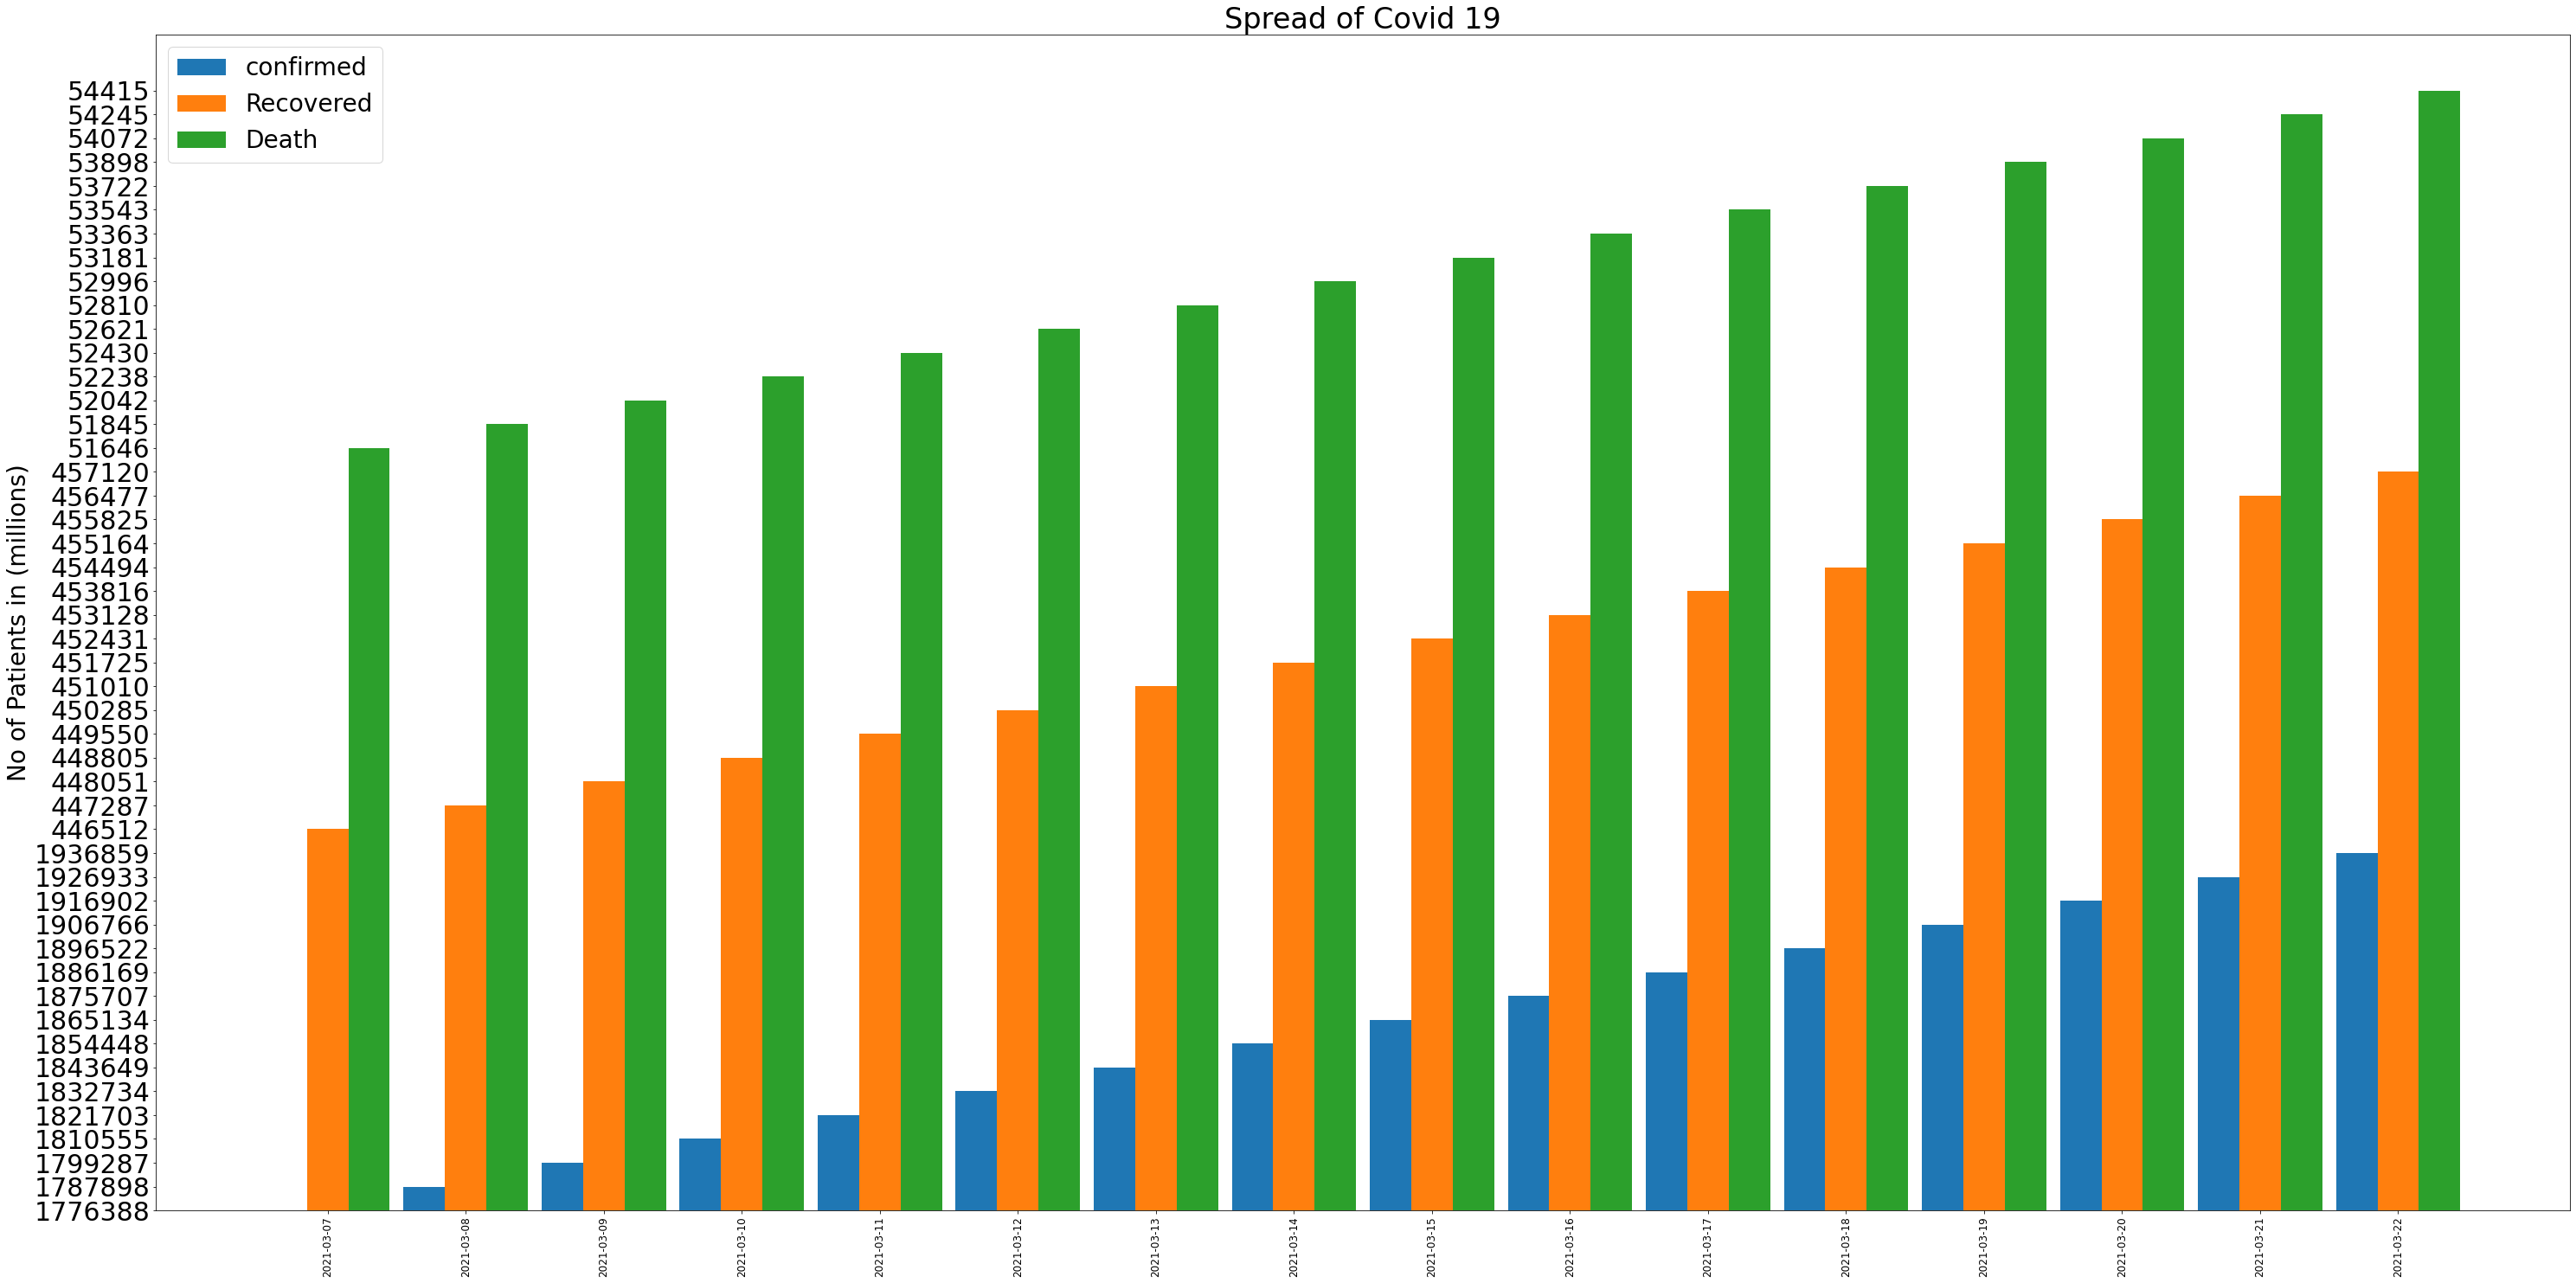

In [14]:
if Debug:
    print(Covid_19_Countires_Wise)
Visualize(val123, 
          ['US'],'Spread of Covid 19','No of Patients in (millions)',vx=50,vy=25,w=.3)

## Prediction Prototype Algorithm
<a class="anchor" id="PredictionPrototypeAlgorithm"></a>

In [15]:
countries = ['Afghanistan','Italy' , 'Kuwait', 'India', 'South Africa' ,'US','Bangladesh', 'Brazil',
             'United Kingdom','Sri Lanka', 'Chile' , 'Norway', 'New Zealand' ,'Switzerland','Ireland','Argentina',
'Australia', 'Canada', 'China','Slovenia','North Macedonia','Zimbabwe','Sweden','Netherlands','Pakistan']


## Covid 19 Data Frame Generated by Time Series Model
<a class="anchor" id="Covid19DataFrameGeneratedbyTimeSeriesModel"></a>

In [16]:
Complete_data_Time_series_model = Complete_Data

if Verbose:
    Complete_data_Time_series_model

## Covid-19 Data Frame 
<a class="anchor" id="Covid19DataFrame"></a>

In [17]:
## Extracting the latest avaialbele data in the Data Frame
length = len(Covid_19_Countires_Wise['Date'])
Latest_date = Covid_19_Countires_Wise['Date'][length-1]

if Verbose:
    print("Size of data is = " +  str(length))
    print("The Latest Date for the Data is = " + Latest_date)

Size of data is = 78720
The Latest Date for the Data is = 2021-03-06


In [18]:
## Loading the Latest data for the clustering

Complete_Data = Covid_19_Countires_Wise[Covid_19_Countires_Wise['Date'] == Latest_date]
Complete_Data.fillna(0)

if Verbose:
    Complete_Data

In [19]:
## To Activate Time series Model Data in model uncomment this line !!

#Complete_Data = Complete_data_Time_series_model

In [20]:
# Covid Data 
Complete_Data = np.array(Complete_Data)
Complete_Data[:,[2,3,4]] = np.array(Complete_Data[:,[2,3,4]]).astype(int)
selected_countries = np.zeros(shape=(1,4)) 
data = Complete_Data[:,[0,1,2,3,4]]
filter1 = []
for i in countries:
    filter1.clear()
    for j in range(0,len(data[:,0])):
            if(data[j,1] == i):
                filter1.append(True)
            else:
                filter1.append(False)
    Complete_Data = data[filter1]
    for j in range(0,len(Complete_Data[:,0])):
                if(Complete_Data[j,1] == i):
                
                    '''for k in range(0,len(Complete_Data[:,[2]])):
                        w1.append((len(Complete_Data[:,[2]])- k)/len(Complete_Data[:,[2]]))
                                                                                            '''
                    val1 = ((sum(Complete_Data[:,2]))/len(Complete_Data[:,[2]]))
                    val2 = ((sum(Complete_Data[:,3]))/len(Complete_Data[:,[3]]))
                    val3 = ((sum(Complete_Data[:,4]))/len(Complete_Data[:,[4]]))
                    selected_countries = np.append(selected_countries,[str(i),int(val1),int(val2),int(val3)])
                    selected_countries = selected_countries.reshape((int(len(selected_countries)/4)),4)
                    break;
selected_countries   = selected_countries[1:,[0,1,2,3]]


if Verbose:
    print(selected_countries[:,[0,1,2,3]])



[['Afghanistan' '55840' '49369' '2449']
 ['Italy' '3046762' '2481372' '99578']
 ['Kuwait' '199428' '185231' '1120']
 ['India' '11210799' '10868520' '157756']
 ['South Africa' '1520206' '1439515' '50647']
 ['US' '28952137' '0' '524319']
 ['Bangladesh' '549724' '501966' '8451']
 ['Brazil' '10938836' '9686024' '264325']
 ['United Kingdom' '4225906' '11849' '124654']
 ['Sri Lanka' '85150' '81769' '493']
 ['Chile' '876895' '801537' '21008']
 ['Norway' '74546' '17998' '632']
 ['New Zealand' '2399' '2301' '26']
 ['Switzerland' '562290' '317600' '10046']
 ['Ireland' '222699' '23364' '4419']
 ['Argentina' '2146714' '1940317' '52870']
 ['Australia' '29034' '22928' '909']
 ['Canada' '889551' '837730' '22212']
 ['China' '101097' '95830' '4838']
 ['Slovenia' '195086' '180366' '3888']
 ['North Macedonia' '106832' '94461' '3185']
 ['Zimbabwe' '36260' '33805' '1485']
 ['Sweden' '684961' '0' '13003']
 ['Netherlands' '1130694' '14687' '15931']
 ['Pakistan' '590508' '559248' '13205']]


# Selecting the population of the countries under consideration  
<a class="anchor" id="Selectingthepopulationofthecountriesunderconsideration"></a>

In [21]:
if Verbose:
    Population_Data_Countires_Wise_Descreet

In [22]:
# Covid countries population Data 
Complete_Data_pop = Population_Data_Countires_Wise_Descreet
Complete_Data_pop = np.array(Complete_Data_pop)
Complete_Data_pop[:,[8,9]] = np.array(Complete_Data_pop[:,[8,9]]).astype(int)
selected_countries_pop = np.zeros(shape=(1,3)) 
data = Complete_Data_pop[:,[0,1,2,3,4,5,6,7,8,9]]
filter1 = []
for i in countries:
    filter1.clear()
    for j in range(0,len(data[:,0])):
            if(data[j,1] == i):
                filter1.append(True)
            else:
                filter1.append(False)
    Complete_Data_pop = data[filter1]
    for j in range(0,len(Complete_Data_pop[:,0])):
                if(Complete_Data_pop[j,1] == i):
                
                    '''for k in range(0,len(Complete_Data_pop[:,[2]])):
                        w1.append((len(Complete_Data_pop[:,[2]])- k)/len(Complete_Data_pop[:,[2]]))
                                                                                            '''
                    val1 = ((sum(Complete_Data_pop[:,8]))/len(Complete_Data_pop[:,[8]]))
                    val2 = ((sum(Complete_Data_pop[:,9]))/len(Complete_Data_pop[:,[9]]))
                    selected_countries_pop = np.append(selected_countries_pop,[str(i),int(val1),int(val2)])
                    selected_countries_pop = selected_countries_pop.reshape((int(len(selected_countries_pop)/3)),3)
                    break;
selected_countries_pop   = selected_countries_pop[1:,[0,1,2]]


if Verbose:
    print(selected_countries_pop[:,[0,1,2]])

[['Afghanistan' '38928' '59']
 ['Italy' '60461' '205']
 ['Kuwait' '4270' '239']
 ['India' '1380004' '464']
 ['South Africa' '59308' '48']
 ['US' '331002' '36']
 ['Bangladesh' '164689' '1265']
 ['Brazil' '212559' '25']
 ['United Kingdom' '67886' '280']
 ['Sri Lanka' '21413' '341']
 ['Chile' '19116' '25']
 ['Norway' '5421' '14']
 ['New Zealand' '4822' '18']
 ['Switzerland' '8654' '219']
 ['Ireland' '4937' '71']
 ['Argentina' '45195' '16']
 ['Australia' '25499' '3']
 ['Canada' '37742' '4']
 ['China' '1439323' '153']
 ['Slovenia' '2078' '103']
 ['North Macedonia' '2083' '82']
 ['Zimbabwe' '14862' '38']
 ['Sweden' '10099' '24']
 ['Netherlands' '17134' '508']
 ['Pakistan' '220892' '286']]


In [23]:
s_c_pop_df = pd.DataFrame(selected_countries_pop)
s_c_df = pd.DataFrame(selected_countries)
int(s_c_pop_df[s_c_pop_df[0] == 'Afghanistan'][1])
s_c_df_not_norm = s_c_df
if True:
    s_c_df

## Normalising covid data with population 
<a class="anchor" id="Normalisingcoviddatawithpopulation"></a>

In [24]:
for i in range(len(s_c_df)):
    s_c_df[1][i] = (int(s_c_df[1][i])/int(s_c_pop_df[s_c_pop_df[0] == s_c_df[0][i] ][1]))*0.1 ## population data values are in thousands
    s_c_df[2][i] = (int(s_c_df[2][i])/int(s_c_pop_df[s_c_pop_df[0] == s_c_df[0][i] ][1]))*0.1 ## population data values are in thousands
    s_c_df[3][i] = (int(s_c_df[3][i])/int(s_c_pop_df[s_c_pop_df[0] == s_c_df[0][i] ][1]))*0.1 ## population data values are in thousands
    

In [25]:
s_c_df = np.array(s_c_df)
selected_countries = s_c_df
if Debug:
    print(selected_countries)

[['Afghanistan' 0.14344430743937528 0.1268213111385121
  0.006291101520756268]
 ['Italy' 5.039218669886374 4.104086932071914 0.16469790443426344]
 ['Kuwait' 4.670444964871194 4.337962529274004 0.026229508196721315]
 ['India' 0.8123743844220741 0.7875716302271588 0.011431561067938934]
 ['South Africa' 2.5632393606258854 2.4271852026708034
  0.08539657381803467]
 ['US' 8.746816333436051 0.0 0.1584035746007577]
 ['Bangladesh' 0.333795214009436 0.30479631305065913 0.005131490263466291]
 ['Brazil' 5.146258685823701 4.556863741361222 0.12435370885260094]
 ['United Kingdom' 6.225003682644434 0.01745426155613823
  0.18362254367616299]
 ['Sri Lanka' 0.3976556297576239 0.38186615607341334
  0.0023023397001821324]
 ['Chile' 4.5872305921740955 4.193016321406152 0.1098974680895585]
 ['Norway' 1.3751337391625162 0.3320051650986903 0.011658365615200148]
 ['New Zealand' 0.04975114060555786 0.04771878888428038
  0.0005391953546246371]
 ['Switzerland' 6.497457822972037 3.669979200369771 0.11608504737693

In [26]:
#clustering = DBSCAN(eps=300, min_samples=5).fit(selected_countries[:,[1,2,3]])
clustering = KMeans(n_clusters=6, random_state=0).fit(selected_countries[:,[1,2,3]])  # Converted no of Clusters from 5 -->3
clustering.labels_
clus = list(clustering.labels_)
covid_frame = list(zip(countries,clus))
covid_frame1 = list(zip(selected_countries[:,[1]].tolist(),selected_countries[:,[2]].tolist(),selected_countries[:,[3]].tolist(),clus))
covid_frame1_data = covid_frame1
if Debug:
    print(covid_frame)
    print(covid_frame1)

[('Afghanistan', 0), ('Italy', 1), ('Kuwait', 1), ('India', 0), ('South Africa', 4), ('US', 5), ('Bangladesh', 0), ('Brazil', 1), ('United Kingdom', 2), ('Sri Lanka', 0), ('Chile', 1), ('Norway', 0), ('New Zealand', 0), ('Switzerland', 1), ('Ireland', 2), ('Argentina', 1), ('Australia', 0), ('Canada', 4), ('China', 0), ('Slovenia', 3), ('North Macedonia', 1), ('Zimbabwe', 0), ('Sweden', 2), ('Netherlands', 2), ('Pakistan', 0)]
[([0.14344430743937528], [0.1268213111385121], [0.006291101520756268], 0), ([5.039218669886374], [4.104086932071914], [0.16469790443426344], 1), ([4.670444964871194], [4.337962529274004], [0.026229508196721315], 1), ([0.8123743844220741], [0.7875716302271588], [0.011431561067938934], 0), ([2.5632393606258854], [2.4271852026708034], [0.08539657381803467], 4), ([8.746816333436051], [0.0], [0.1584035746007577], 5), ([0.333795214009436], [0.30479631305065913], [0.005131490263466291], 0), ([5.146258685823701], [4.556863741361222], [0.12435370885260094], 1), ([6.225003

In [27]:
## Dimensionality Reduction for clusters to plot Graphs in 2D

x = selected_countries[:,[1,2,3]]
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principleDf_Array = np.array(principalDf)
principleDf_Array[:,[0,1]].tolist()
covid_frame1 = list(zip(principleDf_Array[:,[0]].tolist(),principleDf_Array[:,[1]].tolist(),clus))
if Debug:
    print(covid_frame1)

[([-3.7311641246466354], [-0.3178272713510901], 0), ([2.532873320236754], [-1.0736816623360261], 1), ([2.3430541099388393], [-1.4691486679730297], 1), ([-2.8130602224215924], [-0.5205076048502943], 0), ([-0.4568068499046903], [-0.9745105959484153], 4), ([3.482598910034499], [4.374582680668464], 5), ([-3.4753088964064367], [-0.36701955090963945], 0), ([2.863981429453728], [-1.4001051109609808], 1), ([1.3588345035139642], [3.0163771870809235], 2), ([-3.3802646718609797], [-0.3982331989428107], 0), ([2.196897939187372], [-1.3901811225907277], 1), ([-2.579698937242364], [0.16483626768565457], 0), ([-3.8526824599462315], [-0.30085529555744234], 0), ([3.5344013240793735], [0.07023917611777919], 1), ([0.14979624306659378], [1.716629889657741], 2), ([2.3880284977598465], [-1.388244605032845], 1), ([-3.7759030124463635], [-0.30238102829627106], 0), ([-0.7424225887593459], [-0.9090015784869844], 4), ([-3.9107136230784496], [-0.2888763331583992], 0), ([8.650751343028533], [-2.6283455400091325], 3

# Covid-19 Clusters Plot
<a class="anchor" id="Covid19ClustersPlot"></a>

([[-3.7311641246466354], [-2.8130602224215924], [-3.4753088964064367], [-3.3802646718609797], [-2.579698937242364], [-3.8526824599462315], [-3.7759030124463635], [-3.9107136230784496], [-3.5924196563259336], [-3.5590314461821486]], [[-0.3178272713510901], [-0.5205076048502943], [-0.36701955090963945], [-0.3982331989428107], [0.16483626768565457], [-0.30085529555744234], [-0.30238102829627106], [-0.2888763331583992], [-0.34939394324637774], [-0.3587462034820431]])
([[2.532873320236754], [2.3430541099388393], [2.863981429453728], [2.196897939187372], [3.5344013240793735], [2.3880284977598465], [2.8379511571188614]], [[-1.0736816623360261], [-1.4691486679730297], [-1.4001051109609808], [-1.3901811225907277], [0.07023917611777919], [-1.388244605032845], [-1.3905832211766638]])
([[1.3588345035139642], [0.14979624306659378], [1.8201871521791069], [1.7101205596236844]], [[3.0163771870809235], [1.716629889657741], [3.3277372546331994], [3.1572400784654056]])
([[8.650751343028533]], [[-2.628345

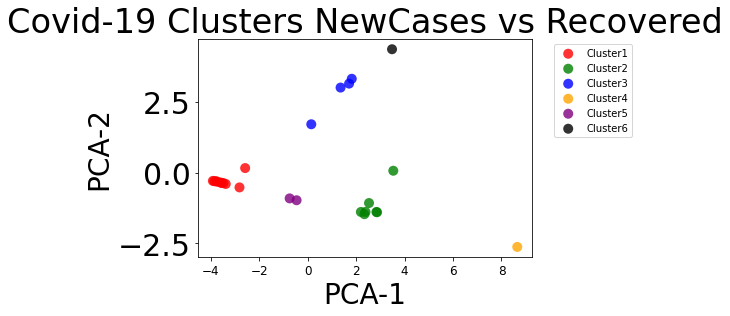

In [28]:
# Visulaize  Clusters 

title = 'Covid-19 Clusters NewCases vs Recovered'
xlabel = 'PCA-1'
ylabel = 'PCA-2'
zlabel = "cases_detected"
plot_cluster(covid_frame1,title,xlabel,ylabel)

In [29]:
# Auto Labeling of CLusters
selected_countries_pop[:,[0,1,2]]

array([['Afghanistan', '38928', '59'],
       ['Italy', '60461', '205'],
       ['Kuwait', '4270', '239'],
       ['India', '1380004', '464'],
       ['South Africa', '59308', '48'],
       ['US', '331002', '36'],
       ['Bangladesh', '164689', '1265'],
       ['Brazil', '212559', '25'],
       ['United Kingdom', '67886', '280'],
       ['Sri Lanka', '21413', '341'],
       ['Chile', '19116', '25'],
       ['Norway', '5421', '14'],
       ['New Zealand', '4822', '18'],
       ['Switzerland', '8654', '219'],
       ['Ireland', '4937', '71'],
       ['Argentina', '45195', '16'],
       ['Australia', '25499', '3'],
       ['Canada', '37742', '4'],
       ['China', '1439323', '153'],
       ['Slovenia', '2078', '103'],
       ['North Macedonia', '2083', '82'],
       ['Zimbabwe', '14862', '38'],
       ['Sweden', '10099', '24'],
       ['Netherlands', '17134', '508'],
       ['Pakistan', '220892', '286']], dtype='<U32')

## Labeling Criterion for Covid Data
<a class="anchor" id="LabelingCriterionforCovidData"></a>
* Cluster 0 ------> Severity 0 Lowest  
* Cluster 1 ------> Severity 5 Extream 
* Cluster 2 ------> Severity 1 Lower   
* Cluster 3 ------> Severity 4 Highest 
* Cluster 4 ------> Severity 3 High 
* Cluster 5 ------> Severity 2 Medium 

In [30]:
data_covid = pd.DataFrame(np.array(covid_frame1_data),columns=['Total_cases','Recovered','Deaths','cluster'])
_,labeled_clus_covid = auto_labeler(data_covid,[-1,1,-1])

Cluster Mean Values [[0.37443483920450116, 0.2557991017805592, 0.005722498968371278, 0.0], [5.117037146289676, 4.241424848501556, 0.11587858124231218, 1.0], [6.029352031444821, 0.14410389403186016, 0.12371613416519239, 2.0], [9.388161693936478, 8.679788257940329, 0.1871029836381136, 3.0], [2.4600826658463006, 2.323403952085229, 0.07212439045413949, 4.0], [8.746816333436051, 0.0, 0.1584035746007577, 5.0]]
3
Final Cumlative Cluster Scores[-0.12435823639231323, -0.991490879030432, -6.0089642715781535, -0.8954764196342629, -0.20880310421521092, -8.905219908036809]
Final Cumlative Cluster Scores sorted [-8.905219908036809, -6.0089642715781535, -0.991490879030432, -0.8954764196342629, -0.20880310421521092, -0.12435823639231323]
Labeled Cluster:- [5, 2, 1, 3, 4, 0]

Cluster Auto Labeling 

Cluster 5 ------> Sever-1Susceptibility


Cluster 2 ------> Sever-2Susceptibility


Cluster 1 ------> Sever-3Susceptibility


Cluster 3 ------> Sever-4Susceptibility


Cluster 4 ------> Sever-5Susceptibilit

<ipython-input-30-ad21a0d087ec>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  data_covid = pd.DataFrame(np.array(covid_frame1_data),columns=['Total_cases','Recovered','Deaths','cluster'])


In [31]:
if Verbose:
    print(list(zip(selected_countries[:,[0]].tolist(),clus)))

[(['Afghanistan'], 0), (['Italy'], 1), (['Kuwait'], 1), (['India'], 0), (['South Africa'], 4), (['US'], 5), (['Bangladesh'], 0), (['Brazil'], 1), (['United Kingdom'], 2), (['Sri Lanka'], 0), (['Chile'], 1), (['Norway'], 0), (['New Zealand'], 0), (['Switzerland'], 1), (['Ireland'], 2), (['Argentina'], 1), (['Australia'], 0), (['Canada'], 4), (['China'], 0), (['Slovenia'], 3), (['North Macedonia'], 1), (['Zimbabwe'], 0), (['Sweden'], 2), (['Netherlands'], 2), (['Pakistan'], 0)]


In [32]:
if Debug:
    print(s_c_df_not_norm)

                  0         1         2         3
0       Afghanistan  0.143444  0.126821  0.006291
1             Italy  5.039219  4.104087  0.164698
2            Kuwait  4.670445  4.337963  0.026230
3             India  0.812374  0.787572  0.011432
4      South Africa  2.563239  2.427185  0.085397
5                US  8.746816  0.000000  0.158404
6        Bangladesh  0.333795  0.304796  0.005131
7            Brazil  5.146259  4.556864  0.124354
8    United Kingdom  6.225004  0.017454  0.183623
9         Sri Lanka  0.397656  0.381866  0.002302
10            Chile  4.587231  4.193016  0.109897
11           Norway  1.375134  0.332005  0.011658
12      New Zealand  0.049751  0.047719  0.000539
13      Switzerland  6.497458  3.669979  0.116085
14          Ireland  4.510816  0.473243  0.089508
15        Argentina  4.749893  4.293212  0.116982
16        Australia  0.113863  0.089917  0.003565
17           Canada  2.356926  2.219623  0.058852
18            China  0.007024  0.006658  0.000336


## Population data based on classification of Age groups
<a class="anchor" id="PopulationdatabasedonclassificationofAgegroups"></a>
### 1. Age 0-16
### 2. Age 17-45
### 3. Age 46-60
### 4. Age 61+

In [33]:
selected_countries = np.array(Population_Data_Age_Wise)
if Debug:
    selected_countries

In [34]:
## Clustering

clustering = KMeans(n_clusters=4, random_state=0).fit(selected_countries[:,[1,2,3,4]])
clustering.labels_
clus = list(clustering.labels_)
age_frame = list(zip(countries,clus))
age_frame1 = list(zip(selected_countries[:,[2]].tolist(),selected_countries[:,[3]].tolist(),clus))
age_frame2 = list(zip(selected_countries[:,[1]].tolist(),selected_countries[:,[2]].tolist(),selected_countries[:,[3]].tolist(),selected_countries[:,[4]].tolist(),clus))
if Debug:
    print(age_frame)
    print("-------------------------cluster data wise---------------------------------------")
    print(age_frame1)
    print("-------------------------------------------------------------------------------")
    print(age_frame2)

if Verbose:
    pd.DataFrame(np.array(age_frame2),columns=['Age 0-16','Age 17-45','Age 46-60','Age 61-100','cluster'])

[('Afghanistan', 0), ('Italy', 0), ('Kuwait', 0), ('India', 1), ('South Africa', 0), ('US', 2), ('Bangladesh', 2), ('Brazil', 2), ('United Kingdom', 0), ('Sri Lanka', 0), ('Chile', 0), ('Norway', 0), ('New Zealand', 0), ('Switzerland', 0), ('Ireland', 0), ('Argentina', 0), ('Australia', 0), ('Canada', 0), ('China', 3), ('Slovenia', 0), ('North Macedonia', 0), ('Zimbabwe', 0), ('Sweden', 0), ('Netherlands', 0), ('Pakistan', 2)]
-------------------------cluster data wise---------------------------------------
[([15373], [3019], 0), ([19271], [14347], 0), ([1997], [939], 0), ([614122], [203095], 1), ([26746], [7945], 0), ([123131], [62685], 2), ([76055], [23698], 2), ([93943], [37617], 2), ([24331], [13483], 0), ([8254], [3869], 0), ([7966], [3569], 0), ([1985], [1074], 0), ([1729], [937], 0), ([3075], [1913], 0), ([1826], [937], 0), ([18511], [6921], 0), ([9571], [4755], 0), ([13963], [7625], 0), ([566334], [337896], 3), ([697], [442], 0), ([830], [421], 0), ([5951], [1160], 0), ([3507],

<ipython-input-34-5c44026c03fc>:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  pd.DataFrame(np.array(age_frame2),columns=['Age 0-16','Age 17-45','Age 46-60','Age 61-100','cluster'])


In [35]:
pd.DataFrame(np.array(age_frame2),columns=['Age 0-16','Age 17-45','Age 46-60','Age 61-100','cluster'])

<ipython-input-35-b3ffe7048f8e>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  pd.DataFrame(np.array(age_frame2),columns=['Age 0-16','Age 17-45','Age 46-60','Age 61-100','cluster'])


,Age 0-16,Age 17-45,Age 46-60,Age 61-100,cluster
0,[17104],[15373],[3019],[1566],0
1,[8538],[19271],[14347],[17758],0
2,[947],[1997],[939],[236],0
3,[389054],[614122],[203095],[134805],1
4,[17945],[26746],[7945],[4902],0
5,[65240],[123131],[62685],[73663],2
6,[47493],[76055],[23698],[12599],2
7,[47528],[93943],[37617],[28638],2
8,[12668],[24331],[13483],[16265],0
9,[5442],[8254],[3869],[3377],0


In [36]:
## Dimensionality Reduction for clusters to plot Graphs in 2D


x = selected_countries[:,[1,2,3,4]]
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principleDf_Array = np.array(principalDf)
principleDf_Array[:,[0,1]].tolist()
age_frame1 = list(zip(principleDf_Array[:,[0]].tolist(),principleDf_Array[:,[1]].tolist(),clus))

if Debug:
    print(age_frame1)

[([-68109.81906336284], [-8220.440425139592], 0), ([-60719.40652620907], [11580.609942262456], 0), ([-86790.31876104887], [485.18654995509723], 0), ([670318.4837470956], [-104751.4786780972], 1), ([-56216.516854110436], [-5618.472205665279], 0), ([76996.96414317373], [25299.161350511706], 2), ([3042.613985775529], [-15221.655111669534], 2), ([26085.84024356945], [-712.6733928850017], 2), ([-55613.76165642736], [7209.664957273625], 0), ([-78069.37618926284], [630.8645820839306], 0), ([-79115.003869974], [1182.9318439590634], 0), ([-86487.54363802384], [1077.977062342005], 0), ([-86789.20780146185], [927.6010010901749], 0), ([-84945.15236106433], [1719.7682509361784], 0), ([-86692.41889109445], [805.4086651098613], 0), ([-65294.64513219843], [-557.4781937223732], 0), ([-76347.7355660413], [2208.1169097478646], 0), ([-70442.57390000908], [4688.043150162459], 0), ([656072.4934371647], [108177.54248244686], 3), ([-88184.59744064216], [882.2546508686331], 0), ([-88109.39326867052], [751.3362

# Age groups Classification Clusters Plot
<a class="anchor" id="AgegroupsClassificationClustersPlot"></a>

([[-68109.81906336284], [-60719.40652620907], [-86790.31876104887], [-56216.516854110436], [-55613.76165642736], [-78069.37618926284], [-79115.003869974], [-86487.54363802384], [-86789.20780146185], [-84945.15236106433], [-86692.41889109445], [-65294.64513219843], [-76347.7355660413], [-70442.57390000908], [-88184.59744064216], [-88109.39326867052], [-81060.2840036682], [-84260.26566183753], [-80906.44425321305]], [[-8220.440425139592], [11580.609942262456], [485.18654995509723], [-5618.472205665279], [7209.664957273625], [630.8645820839306], [1182.9318439590634], [1077.977062342005], [927.6010010901749], [1719.7682509361784], [805.4086651098613], [-557.4781937223732], [2208.1169097478646], [4688.043150162459], [882.2546508686331], [751.3362805038665], [-2738.3824875909268], [1636.880724967593], [2828.881584257569]])
([[670318.4837470956]], [[-104751.4786780972]])
([[76996.96414317373], [3042.613985775529], [26085.84024356945], [31638.06928154113]], [[25299.161350511706], [-15221.65511

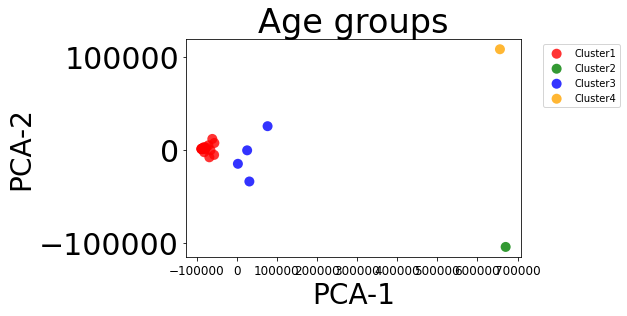

In [37]:
# Visulaize  Clusters 
title = 'Age groups'
xlabel = 'PCA-1'
ylabel = 'PCA-2'
zlabel = 'Classification based on population Age groups'
plot_cluster(age_frame1,title,xlabel,ylabel)
#plot_cluster_3d(hiv_frame2,title,xlabel,ylabel,zlabel)

# Cluste Labeling :- Age groups
<a class="anchor" id="ClusteLabelingAgegroups"></a>
* Cluster 0 ------> Severity 1 Lower Susceptibility
* Cluster 1 ------> Severity 3 Higher Susceptibility
* Cluster 2 ------> Severity 2 Moderate Susceptibility
* Cluster 3 ------> Severity 4 Critical Susceptibility

In [38]:
data_pop = pd.DataFrame(np.array(age_frame2),columns=['Age_0_16','Age_17_45','Age_46_60','Age_61_100','cluster'])
_,labeled_clus_pop = auto_labeler(data_pop,[1,1,-1,-1])

Cluster Mean Values [[5586.315789473684, 9020.315789473685, 4157.0526315789475, 4341.0, 0.0], [389054.0, 614122.0, 203095.0, 134805.0, 1.0], [60154.75, 96622.0, 37010.75, 32313.75, 2.0], [271674.0, 566334.0, 337896.0, 241371.0, 3.0]]
4
Final Cumlative Cluster Scores[6108.5789473684235, 665276.0, 87452.25, 258741.0]
Final Cumlative Cluster Scores sorted [6108.5789473684235, 87452.25, 258741.0, 665276.0]
Labeled Cluster:- [0, 2, 3, 1]

Cluster Auto Labeling 

Cluster 0 ------> Sever-1Susceptibility


Cluster 2 ------> Sever-2Susceptibility


Cluster 3 ------> Sever-3Susceptibility


Cluster 1 ------> Sever-4Susceptibility




<ipython-input-38-42385e2c6143>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  data_pop = pd.DataFrame(np.array(age_frame2),columns=['Age_0_16','Age_17_45','Age_46_60','Age_61_100','cluster'])


# Co-morbidities Dataframe Clustering
<a class="anchor" id="ComorbiditiesDataframeClustering"></a>

## HIV
<a class="anchor" id="HIV"></a>

In [39]:
## Check the List of Countries avaialable
#HIV_Countires_Wise = pd.read_csv('../HIV infected Population/Data_Extract_From_Health_Nutrition_and_Population_Statistics/c600116a-af72-4faa-945a-ab00ddddb96e_Data.csv')

## Columns renaming for Uniformity

#------------------------------------------------------------
HIV_Countires_Wise_complete = HIV_Countires_Wise
# HIV Data 
HIV_Countires_Wise_complete = np.array(HIV_Countires_Wise_complete)
HIV_Countires_Wise_complete[:,[2,3,4]] = np.array(HIV_Countires_Wise_complete[:,[2,3,4]]).astype(int)
selected_countries = np.zeros(shape=(1,4)) 
data_hiv = HIV_Countires_Wise_complete[:,[0,1,2,3,4]]
filter2 = []
for i in countries:
    filter2.clear()
    for j in range(0,len(data_hiv[:,0])):
            if(data_hiv[j,0] == i):
                filter2.append(True)
            else:
                filter2.append(False)
    HIV_Countires_Wise_complete = data_hiv[filter2]
    for j in range(0,len(HIV_Countires_Wise_complete[:,0])):
                if(HIV_Countires_Wise_complete[j,0] == i):
                    val1 = ((sum(HIV_Countires_Wise_complete[:,2]))/len(HIV_Countires_Wise_complete[:,[2]]))
                    val2 = ((sum(HIV_Countires_Wise_complete[:,3]))/len(HIV_Countires_Wise_complete[:,[3]]))
                    val3 = ((sum(HIV_Countires_Wise_complete[:,4]))/len(HIV_Countires_Wise_complete[:,[4]]))
                    selected_countries = np.append(selected_countries,[str(i),int(val1),int(val2),int(val3)])
                    selected_countries = selected_countries.reshape((int(len(selected_countries)/4)),4)
                    break;
selected_countries   = selected_countries[1:,[0,1,2,3]]


if Debug:
    print(selected_countries[:,[0,1,2,3]])

[['Afghanistan' '6500' '6900' '6700']
 ['Italy' '130000' '130000' '130000']
 ['Kuwait' '600' '640' '620']
 ['India' '0' '0' '0']
 ['South Africa' '7300000' '7500000' '7400000']
 ['US' '0' '0' '0']
 ['Bangladesh' '13000' '13000' '13000']
 ['Brazil' '0' '0' '0']
 ['United Kingdom' '100000' '50000' '50000']
 ['Sri Lanka' '3500' '3400' '3450']
 ['Chile' '66000' '71000' '68500']
 ['Norway' '5700' '5800' '5750']
 ['New Zealand' '3500' '3600' '3550']
 ['Switzerland' '0' '0' '0']
 ['Ireland' '6800' '7200' '7000']
 ['Argentina' '130000' '140000' '135000']
 ['Australia' '27000' '28000' '27500']
 ['Canada' '0' '0' '0']
 ['China' '0' '0' '0']
 ['Slovenia' '0' '0' '0']
 ['North Macedonia' '500' '500' '500']
 ['Zimbabwe' '1200000' '1200000' '1200000']
 ['Sweden' '0' '0' '0']
 ['Netherlands' '23000' '11500' '11500']
 ['Pakistan' '140000' '160000' '150000']]


In [40]:
clustering = KMeans(n_clusters=2, random_state=0).fit(selected_countries[:,[1,2,3]])
clustering.labels_
clus = list(clustering.labels_)
hiv_frame = list(zip(countries,clus))

hiv_frame1 = list(zip(selected_countries[:,[2]].tolist(),selected_countries[:,[3]].tolist(),clus))
hiv_frame2 = list(zip(selected_countries[:,[1]].tolist(),selected_countries[:,[2]].tolist(),selected_countries[:,[3]].tolist(),clus))
if Debug:
    print(hiv_frame)
    print("-------------------------cluster data wise---------------------------------------")
    print(hiv_frame1)
    print("-------------------------------------------------------------------------------")
    print(hiv_frame2)
if Verbose:
    pd.DataFrame(np.array(hiv_frame2),columns=['val1','val2','val3','cluster'])

[('Afghanistan', 0), ('Italy', 0), ('Kuwait', 0), ('India', 0), ('South Africa', 1), ('US', 0), ('Bangladesh', 0), ('Brazil', 0), ('United Kingdom', 0), ('Sri Lanka', 0), ('Chile', 0), ('Norway', 0), ('New Zealand', 0), ('Switzerland', 0), ('Ireland', 0), ('Argentina', 0), ('Australia', 0), ('Canada', 0), ('China', 0), ('Slovenia', 0), ('North Macedonia', 0), ('Zimbabwe', 0), ('Sweden', 0), ('Netherlands', 0), ('Pakistan', 0)]
-------------------------cluster data wise---------------------------------------
[(['6900'], ['6700'], 0), (['130000'], ['130000'], 0), (['640'], ['620'], 0), (['0'], ['0'], 0), (['7500000'], ['7400000'], 1), (['0'], ['0'], 0), (['13000'], ['13000'], 0), (['0'], ['0'], 0), (['50000'], ['50000'], 0), (['3400'], ['3450'], 0), (['71000'], ['68500'], 0), (['5800'], ['5750'], 0), (['3600'], ['3550'], 0), (['0'], ['0'], 0), (['7200'], ['7000'], 0), (['140000'], ['135000'], 0), (['28000'], ['27500'], 0), (['0'], ['0'], 0), (['0'], ['0'], 0), (['0'], ['0'], 0), (['500']

<ipython-input-40-a7cab706a747>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  pd.DataFrame(np.array(hiv_frame2),columns=['val1','val2','val3','cluster'])


In [41]:
## Dimensionality Reduction for clusters to plot Graphs in 2D


x = selected_countries[:,[1,2,3]]
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principleDf_Array = np.array(principalDf)
principleDf_Array[:,[0,1]].tolist()
hiv_frame1 = list(zip(principleDf_Array[:,[0]].tolist(),principleDf_Array[:,[1]].tolist(),clus))

if Debug:
    hiv_frame1

## HIV Cluster Plot
<a class="anchor" id="HHIVClusterPlot"></a>

([[-628129.27129435], [-414583.2801206408], [-638662.2947240442], [-639736.4113738163], [-639736.4113738163], [-617221.0982484987], [-639736.4113738163], [-524661.7766742051], [-633761.9671808167], [-521059.3546236722], [-629776.941662745], [-633587.2254224139], [-639736.4113738163], [-627609.687145306], [-405846.1922005001], [-592100.1291676811], [-639736.4113738163], [-639736.4113738163], [-639736.4113738163], [-638870.4377920734], [1438600.184809342], [-639736.4113738163], [-613269.2453929057], [-379789.6326454998]], [[-2427.4475721110666], [15.332049950634284], [-2298.1702229418224], [-2282.823955083289], [-2282.823955083289], [-2053.0083545799052], [-2282.823955083289], [39274.72074921653], [-2156.0676698588245], [-4360.210545436736], [-2246.941507643835], [-2285.833378498266], [-2282.823955083289], [-2422.144135175803], [-6472.953382021453], [-2454.343174158052], [-2282.823955083289], [-2282.823955083289], [-2282.823955083289], [-2273.9848935254927], [18930.923783691644], [-2282.

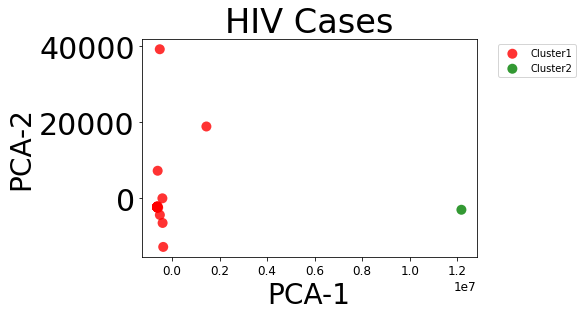

In [42]:
# Visulaize  Clusters 
title = 'HIV Cases'
xlabel = 'PCA-1'
ylabel = 'PCA-2'
zlabel = '2016 HIV CASE'
plot_cluster(hiv_frame1,title,xlabel,ylabel)
#plot_cluster_3d(hiv_frame2,title,xlabel,ylabel,zlabel)

## Cluste Labeling :- HIV Cases
<a class="anchor" id="ClusteLabelingHIVCases"></a>
* Cluster 0 ------> Severity 1 Lower Prevelance
* Cluster 1 ------> Severity 2 High Prevelance


In [43]:
data_Hiv = pd.DataFrame(np.array(hiv_frame2),columns=['2017_cases','2018_cases','2019_cases','cluster'])
_,labeled_clus_hiv = auto_labeler(data_Hiv,[-1,-1,-1])

Cluster Mean Values [[77337.5, 76314.16666666667, 75544.58333333333, 0.0], [7300000.0, 7500000.0, 7400000.0, 1.0]]
3
Final Cumlative Cluster Scores[-229196.25, -22200000.0]
Final Cumlative Cluster Scores sorted [-22200000.0, -229196.25]
Labeled Cluster:- [1, 0]

Cluster Auto Labeling 

Cluster 1 ------> Sever-1Susceptibility


Cluster 0 ------> Sever-2Susceptibility




<ipython-input-43-a830a760d75a>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  data_Hiv = pd.DataFrame(np.array(hiv_frame2),columns=['2017_cases','2018_cases','2019_cases','cluster'])


## Blood Pressure
<a class="anchor" id="BloodPressure"></a>

In [44]:
BP_Male_Data = Blood_Pressure_Countires_Wise[(Blood_Pressure_Countires_Wise['Sex']=='Men') & 
                                             (Blood_Pressure_Countires_Wise['Year']==2015)]
#BP_Male_Data = Blood_Pressure_Countires_Wise[Blood_Pressure_Countires_Wise['Year']==2015]

if Verbose:
    BP_Male_Data

In [45]:
## Check the List of Countries avaialable

## Columns renaming for Uniformity
BP_Male_Data = Blood_Pressure_Countires_Wise[(Blood_Pressure_Countires_Wise['Sex']=='Men') & 
                                             (Blood_Pressure_Countires_Wise['Year']==2015)]

BP_Female_Data =Blood_Pressure_Countires_Wise[(Blood_Pressure_Countires_Wise['Sex']=='Women') & 
                                             (Blood_Pressure_Countires_Wise['Year']==2015)]
#------------------------------------------------------------
Blood_Pressure_Countires_Wise_complete = BP_Male_Data
# BP Data 
Blood_Pressure_Countires_Wise_complete = np.array(Blood_Pressure_Countires_Wise_complete)
Blood_Pressure_Countires_Wise_complete[:,[4,5,6]] = np.array(Blood_Pressure_Countires_Wise_complete[:,[4,5,6]]).astype(float)
selected_countries = np.zeros(shape=(1,4)) 
data_bp = Blood_Pressure_Countires_Wise_complete[:,[0,1,2,3,4,5,6]]

if Debug:
    print(data_bp)
    
filter2 = []
for i in countries:
    filter2.clear()
    for j in range(0,len(data_bp[:,0])):
            if(data_bp[j,0] == i):
                filter2.append(True)
            else:
                filter2.append(False)
    Blood_Pressure_Countires_Wise_complete = data_bp[filter2]
    for j in range(0,len(Blood_Pressure_Countires_Wise_complete[:,0])):
                if(Blood_Pressure_Countires_Wise_complete[j,0] == i):
                    val1 = ((sum(Blood_Pressure_Countires_Wise_complete[:,4]))/len(Blood_Pressure_Countires_Wise_complete[:,[4]]))
                    val2 = ((sum(Blood_Pressure_Countires_Wise_complete[:,5]))/len(Blood_Pressure_Countires_Wise_complete[:,[5]]))
                    val3 = ((sum(Blood_Pressure_Countires_Wise_complete[:,6]))/len(Blood_Pressure_Countires_Wise_complete[:,[6]]))
                    selected_countries = np.append(selected_countries,[str(i),float(val1),float(val2),float(val3)])
                    selected_countries = selected_countries.reshape((int(len(selected_countries)/4)),4)
                    break;
selected_countries_male   = selected_countries[1:,[0,1,2,3]]
if Debug:
    print("-----------------------------------------MALE DATA-------------------------------------------------")
    print(selected_countries_male[:,[0,1,2,3]])

#-----------------------------------------------------------------------------------------------------------------------

Blood_Pressure_Countires_Wise_complete = BP_Female_Data
# BP Data 
Blood_Pressure_Countires_Wise_complete = np.array(Blood_Pressure_Countires_Wise_complete)
Blood_Pressure_Countires_Wise_complete[:,[4,5,6]] = np.array(Blood_Pressure_Countires_Wise_complete[:,[4,5,6]]).astype(float)
selected_countries = np.zeros(shape=(1,4)) 
data_bp = Blood_Pressure_Countires_Wise_complete[:,[0,1,2,3,4,5,6]]

if Debug:
    print(data_bp)
    
filter2 = []
for i in countries:
    filter2.clear()
    for j in range(0,len(data_bp[:,0])):
            if(data_bp[j,0] == i):
                filter2.append(True)
            else:
                filter2.append(False)
    Blood_Pressure_Countires_Wise_complete = data_bp[filter2]
    for j in range(0,len(Blood_Pressure_Countires_Wise_complete[:,0])):
                if(Blood_Pressure_Countires_Wise_complete[j,0] == i):
                    val1 = ((sum(Blood_Pressure_Countires_Wise_complete[:,4]))/len(Blood_Pressure_Countires_Wise_complete[:,[4]]))
                    val2 = ((sum(Blood_Pressure_Countires_Wise_complete[:,5]))/len(Blood_Pressure_Countires_Wise_complete[:,[5]]))
                    val3 = ((sum(Blood_Pressure_Countires_Wise_complete[:,6]))/len(Blood_Pressure_Countires_Wise_complete[:,[6]]))
                    selected_countries = np.append(selected_countries,[str(i),float(val1),float(val2),float(val3)])
                    selected_countries = selected_countries.reshape((int(len(selected_countries)/4)),4)
                    break;
selected_countries_female   = selected_countries[1:,[0,1,2,3]]
if Debug:
    print("-----------------------------------------Female DATA-------------------------------------------------")
    print(selected_countries_female[:,[0,1,2,3]])


[['Afghanistan' 'AFG' 'Men' ... 0.3043211568814289 0.204382867902753
  0.41614109712646]
 ['Albania' 'ALB' 'Men' ... 0.330165053351833 0.230231468598675
  0.4429057257001449]
 ['Algeria' 'DZA' 'Men' ... 0.254158233914663 0.170689953685987
  0.351744173622094]
 ...
 ['Yemen' 'YEM' 'Men' ... 0.2988340016317249 0.195062813406127
  0.4159258665886479]
 ['Zambia' 'ZMB' 'Men' ... 0.276251824994491 0.181244487212415
  0.3846862427430439]
 ['Zimbabwe' 'ZWE' 'Men' ... 0.269040837900581 0.174749712256814
  0.373680697553762]]
-----------------------------------------MALE DATA-------------------------------------------------
[['Afghanistan' '0.3043211568814289' '0.204382867902753'
  '0.41614109712646']
 ['Italy' '0.251855487351606' '0.171646839705843' '0.335534497116277']
 ['Kuwait' '0.2554226323945729' '0.1722800631454019' '0.3490054503640329']
 ['India' '0.265892806879322' '0.202463552962243' '0.3369451299441199']
 ['South Africa' '0.273667687805678' '0.1955342943711669'
  '0.362253597323481']


In [46]:
def cluster_diabetes(selected_countries):    
    clustering = KMeans(n_clusters=4, random_state=0).fit(selected_countries[:,[1,2,3]])
    clustering.labels_
    clus = list(clustering.labels_)
    BP_frame = list(zip(countries,clus))
    
    
    if Debug:
        print(BP_frame)
        print("-------------------------cluster data wise---------------------------------------")
    BP_frame1 = list(zip(selected_countries[:,[0]].tolist() , selected_countries[:,[1]].tolist() ,selected_countries[:,[2]].tolist(),selected_countries[:,[3]].tolist(),clus))
    BP_frame2 = list(zip(selected_countries[:,[1]].tolist() ,selected_countries[:,[2]].tolist(),selected_countries[:,[3]].tolist(),clus))
    if Debug:
        print(BP_frame1)
    return BP_frame2,BP_frame1 , BP_frame,clus
BP_data_male,BP_frame1_male , BP_frame_male , bp_clus_male = cluster_diabetes(selected_countries_male)
BP_data_female,BP_frame1_female , BP_frame_female , bp_clus_female = cluster_diabetes(selected_countries_female)
#BP_data_male Required for Autoclustering
#BP_data_female  Required for Autoclustering

[('Afghanistan', 1), ('Italy', 3), ('Kuwait', 3), ('India', 3), ('South Africa', 3), ('US', 2), ('Bangladesh', 0), ('Brazil', 3), ('United Kingdom', 2), ('Sri Lanka', 0), ('Chile', 3), ('Norway', 0), ('New Zealand', 2), ('Switzerland', 0), ('Ireland', 0), ('Argentina', 3), ('Australia', 2), ('Canada', 2), ('China', 0), ('Slovenia', 1), ('North Macedonia', 1), ('Zimbabwe', 3), ('Sweden', 0), ('Netherlands', 0), ('Pakistan', 1)]
-------------------------cluster data wise---------------------------------------
[(['Afghanistan'], ['0.3043211568814289'], ['0.204382867902753'], ['0.41614109712646'], 1), (['Italy'], ['0.251855487351606'], ['0.171646839705843'], ['0.335534497116277'], 3), (['Kuwait'], ['0.2554226323945729'], ['0.1722800631454019'], ['0.3490054503640329'], 3), (['India'], ['0.265892806879322'], ['0.202463552962243'], ['0.3369451299441199'], 3), (['South Africa'], ['0.273667687805678'], ['0.1955342943711669'], ['0.362253597323481'], 3), (['US'], ['0.153083320886504'], ['0.103716

In [47]:
## Dimensionality Reduction for clusters to plot Graphs in 2D

#### MALE#####
x = selected_countries_male[:,[1,2,3]]
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principleDf_Array = np.array(principalDf)
principleDf_Array[:,[0,1]].tolist()
BP_frame1_male = list(zip(principleDf_Array[:,[0]].tolist(),principleDf_Array[:,[1]].tolist(),bp_clus_male))
BP_frame1_male

#### FEMALE#######
x = selected_countries_female[:,[1,2,3]]
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principleDf_Array = np.array(principalDf)
principleDf_Array[:,[0,1]].tolist()
BP_frame1_female = list(zip(principleDf_Array[:,[0]].tolist(),principleDf_Array[:,[1]].tolist(),bp_clus_female))
if Debug:
    BP_frame1_female

## Blood Pressure Cluster Plot
<a class="anchor" id="BloodPressureClusterPlot"></a>

([[-0.002959166045868191], [-0.017765038378210186], [-0.0014037995784052706], [-0.037611495378487604], [-0.02951982441314896], [-0.05462300536588189], [-0.009599067099508744], [-0.02505283812661436]], [[0.001014286258364989], [-0.0240668437262091], [-0.004120236292713798], [-0.005898173515781173], [-0.008549294018848968], [0.004998608844479059], [0.00239448537390344], [0.0042476215072504075]])
([[0.10713986448669649], [0.1991898840624991], [0.1455181899132448], [0.12436145383811564]], [[-0.009413845261767022], [0.0012177022234321514], [-0.0014612974596548158], [0.009410673568299277]])
([[-0.16116899308963908], [-0.12540446575606692], [-0.09342460033124171], [-0.11736683202413212], [-0.15534470404440465]], [[0.0024125678233994285], [0.01932921524801814], [0.0005029732400925844], [0.0025566887657211593], [-0.013459663995844206]])
([[0.006398198760093368], [0.018301742239858896], [0.028085853284008477], [0.0476858075257843], [0.0354689681925544], [0.01604099655528078], [0.0584183757619498

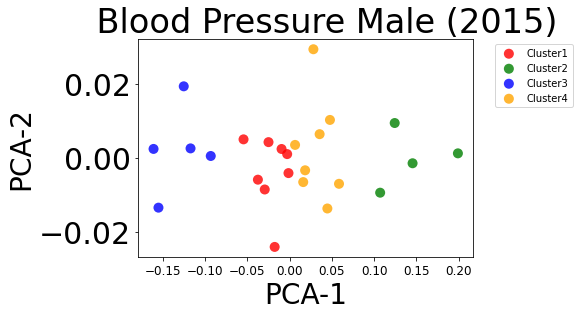

([[-0.1525866997128616], [-0.1269246799626991], [-0.07667287391837545], [-0.10088899944600942], [-0.09484075389371902], [-0.12031594614095505], [-0.14596771063593122], [-0.08446040250555473], [-0.08525504146642211]], [[0.005496634845978445], [0.016940081843925182], [-0.005564952874841456], [-0.0004904108706085316], [-0.003632799817591585], [0.002797899786040741], [-0.005280931765804566], [0.0023695043361212312], [0.0016539649592779743]])
([[0.09186184141108791], [0.11858742725793374], [0.10242041291990005], [0.05233061315217314], [0.10793116849584011], [0.09492909859848754]], [[0.02795988552182849], [0.013022848828242131], [0.0027353339391557627], [-0.01923779679972265], [-0.010656329065933591], [-0.01365269004919295]])
([[-0.03863641682273808], [0.02130773915587751], [0.013991522145319046], [-0.04200324519661627], [-0.043356107583341866], [-0.020713040654139824], [-0.04160559881537064]], [[0.0007984329775541937], [-0.00159961182719417], [0.002572265986204024], [-0.007585758732266486],

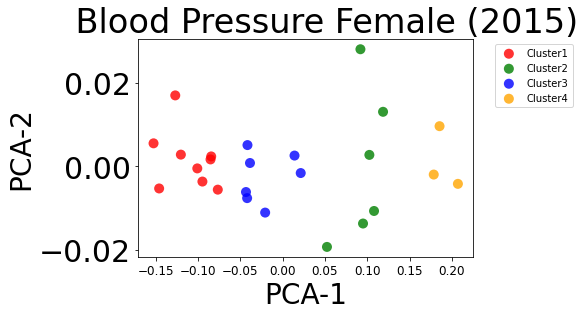

In [48]:
# Visulaize  Clusters 
title1 = '    Blood Pressure Male (2015)'
title2 = '    Blood Pressure Female (2015)'
xlabel = 'PCA-1'
ylabel = 'PCA-2'
plot_cluster(BP_frame1_male,title1,xlabel,ylabel)
plot_cluster(BP_frame1_female,title2,xlabel,ylabel)

<a class="anchor" id="ClusteLabelingBloodPressureCases"></a>
## Cluste Labeling :- Blood Pressure Male

* Cluster 0 ------> Severity 1 Lower Prevelance
* Cluster 1 ------> Severity 2 Medium Prevelance
* Cluster 2 ------> Severity 0 lowest Prevelance
* Cluster 3 ------> Severity 3 Highest Prevelance

## Cluste Labeling :- Blood Pressure Female
* Cluster 0 ------> Severity 0 Loweest Prevelance
* Cluster 1 ------> Severity 2 Medium Prevelance
* Cluster 2 ------> Severity 3 Highest Prevelance
* Cluster 3 ------> Severity 1 Lower Prevelance

In [49]:
data_BP_male = pd.DataFrame(np.array(BP_data_male),columns=['Raised_Blood_Pressure','Raised_Blood_Pressure_more_95','Raised_Blood_Pressure_less_95','cluster'])
_,labeled_clus_bp_male = auto_labeler(data_BP_male,[-1,-1,-1])

data_BP_Female = pd.DataFrame(np.array(BP_data_female),columns=['Raised_Blood_Pressure','Raised_Blood_Pressure_more_95','Raised_Blood_Pressure_less_95','cluster'])
_,labeled_clus_bp_female =auto_labeler(data_BP_Female,[-1,-1,-1])


Cluster Mean Values [[0.23241069272973625, 0.15518175674071133, 0.3202282730397207, 0.0], [0.32609206525559176, 0.2273959246235862, 0.437282247793909, 1.0], [0.17234568911749437, 0.11515115285281614, 0.2393661630986838, 2.0], [0.26411507041530247, 0.1823776370602522, 0.35529658731626873, 3.0]]
3
Final Cumlative Cluster Scores[-0.7078207225101683, -0.990770237673087, -0.5268630050689943, -0.8017892947918235]
Final Cumlative Cluster Scores sorted [-0.990770237673087, -0.8017892947918235, -0.7078207225101683, -0.5268630050689943]
Labeled Cluster:- [1, 3, 0, 2]

Cluster Auto Labeling 

Cluster 1 ------> Sever-1Susceptibility


Cluster 3 ------> Sever-2Susceptibility


Cluster 0 ------> Sever-3Susceptibility


Cluster 2 ------> Sever-4Susceptibility


Cluster Mean Values [[0.12930157049020474, 0.08589221937793635, 0.18256953581579685, 0.0], [0.2439639979442408, 0.16914593812437048, 0.329951670545569, 1.0], [0.17828306519557008, 0.1189961096103217, 0.2481476936977684, 2.0], [0.29776235034774

<ipython-input-49-dbc197c1ba60>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  data_BP_male = pd.DataFrame(np.array(BP_data_male),columns=['Raised_Blood_Pressure','Raised_Blood_Pressure_more_95','Raised_Blood_Pressure_less_95','cluster'])
<ipython-input-49-dbc197c1ba60>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  data_BP_Female = pd.DataFrame(np.array(BP_data_female),columns=['Raised_Blood_Pressure','Raised_Blood_Pressure_more_95','Raised_Blood_Pressure_less_95','cluster'])


## Diabetes

<a class="anchor" id="Diabetes"></a>

In [50]:
Diabetes_Male_Data = Diabetes_Countires_Wise[(Diabetes_Countires_Wise['Sex']=='Men') & 
                                             (Diabetes_Countires_Wise['Year']==2014)]
if Verbose:
    Diabetes_Male_Data

In [51]:
## Check the List of Countries avaialable

## Columns renaming for Uniformity
Diabetes_Male_Data = Diabetes_Countires_Wise[(Diabetes_Countires_Wise['Sex']=='Men') & 
                                             (Diabetes_Countires_Wise['Year']==2014)]

Diabetes_Female_Data =Diabetes_Countires_Wise[(Diabetes_Countires_Wise['Sex']=='Women') & 
                                             (Diabetes_Countires_Wise['Year']==2014)]
#------------------------------------------------------------
Diabetes_Countires_Wise_complete = Diabetes_Male_Data
# Diabetes Data 
Diabetes_Countires_Wise_complete = np.array(Diabetes_Countires_Wise_complete)
Diabetes_Countires_Wise_complete[:,[3,4,5]] = np.array(Diabetes_Countires_Wise_complete[:,[3,4,5]]).astype(float)
selected_countries = np.zeros(shape=(1,4)) 
data_diabetes = Diabetes_Countires_Wise_complete[:,[0,1,2,3,4,5]]

if Debug:
    print(data_diabetes)

filter2 = []
for i in countries:
    filter2.clear()
    for j in range(0,len(data_diabetes[:,0])):
            if(data_diabetes[j,0] == i):
                filter2.append(True)
            else:
                filter2.append(False)
    Diabetes_Countires_Wise_complete = data_diabetes[filter2]
    for j in range(0,len(Diabetes_Countires_Wise_complete[:,0])):
                if(Diabetes_Countires_Wise_complete[j,0] == i):
                    val1 = ((sum(Diabetes_Countires_Wise_complete[:,3]))/len(Diabetes_Countires_Wise_complete[:,[3]]))
                    val2 = ((sum(Diabetes_Countires_Wise_complete[:,4]))/len(Diabetes_Countires_Wise_complete[:,[4]]))
                    val3 = ((sum(Diabetes_Countires_Wise_complete[:,5]))/len(Diabetes_Countires_Wise_complete[:,[5]]))
                    selected_countries = np.append(selected_countries,[str(i),float(val1),float(val2),float(val3)])
                    selected_countries = selected_countries.reshape((int(len(selected_countries)/4)),4)
                    break;
selected_countries_male   = selected_countries[1:,[0,1,2,3]]

if Debug:
    print("-----------------------------------------MALE DATA-------------------------------------------------")
    print(selected_countries_male[:,[0,1,2,3]])

#-----------------------------------------------------------------------------------------------------------------------

Diabetes_Countires_Wise_complete = Diabetes_Female_Data
# Diabetes Data 
Diabetes_Countires_Wise_complete = np.array(Diabetes_Countires_Wise_complete)
Diabetes_Countires_Wise_complete[:,[3,4,5]] = np.array(Diabetes_Countires_Wise_complete[:,[3,4,5]]).astype(float)
selected_countries = np.zeros(shape=(1,4)) 
data_diabetes = Diabetes_Countires_Wise_complete[:,[0,1,2,3,4,5]]

if Debug:
    print(data_diabetes)

filter2 = []
for i in countries:
    filter2.clear()
    for j in range(0,len(data_diabetes[:,0])):
            if(data_diabetes[j,0] == i):
                filter2.append(True)
            else:
                filter2.append(False)
    Diabetes_Countires_Wise_complete = data_diabetes[filter2]
    for j in range(0,len(Diabetes_Countires_Wise_complete[:,0])):
                if(Diabetes_Countires_Wise_complete[j,0] == i):
                    val1 = ((sum(Diabetes_Countires_Wise_complete[:,3]))/len(Diabetes_Countires_Wise_complete[:,[3]]))
                    val2 = ((sum(Diabetes_Countires_Wise_complete[:,4]))/len(Diabetes_Countires_Wise_complete[:,[4]]))
                    val3 = ((sum(Diabetes_Countires_Wise_complete[:,5]))/len(Diabetes_Countires_Wise_complete[:,[5]]))
                    selected_countries = np.append(selected_countries,[str(i),float(val1),float(val2),float(val3)])
                    selected_countries = selected_countries.reshape((int(len(selected_countries)/4)),4)
                    break;
selected_countries_female   = selected_countries[1:,[0,1,2,3]]
if Debug:
    print("-----------------------------------------Female DATA-------------------------------------------------")
    print(selected_countries_female[:,[0,1,2,3]])


[['Afghanistan' 'Men' 2014 0.1156572804380629 0.0640989369903711
  0.181913794305123]
 ['Albania' 'Men' 2014 0.0768787065262333 0.0387682805776147
  0.1305379497963019]
 ['Algeria' 'Men' 2014 0.1226475828277419 0.0743218153722432
  0.188025758603392]
 ...
 ['Yemen' 'Men' 2014 0.1259196340179859 0.0665325354547242
  0.205520183983486]
 ['Zambia' 'Men' 2014 0.064647058833324 0.032622844435312
  0.110545641393193]
 ['Zimbabwe' 'Men' 2014 0.0651377446270955 0.0313399430262513
  0.115730499206471]]
-----------------------------------------MALE DATA-------------------------------------------------
[['Afghanistan' '0.1156572804380629' '0.0640989369903711'
  '0.181913794305123']
 ['Italy' '0.070540891144998' '0.0390557166601463' '0.1119944329492669']
 ['Kuwait' '0.1965936544864349' '0.128437913333102' '0.280923396162734']
 ['India' '0.0905389299901901' '0.0519135364345059' '0.141733485003068']
 ['South Africa' '0.096665809716039' '0.0494772979854629'
  '0.1625976086841569']
 ['US' '0.081696542

In [52]:
def cluster_diabetes(selected_countries):    
    clustering = KMeans(n_clusters=4, random_state=0).fit(selected_countries[:,[1,2,3]])
    clustering.labels_
    clus = list(clustering.labels_)
    DB_frame = list(zip(countries,clus))
    if Debug:
        print(DB_frame)
        print("-------------------------cluster data wise---------------------------------------")
    DB_frame1 = list(zip(selected_countries[:,[0]].tolist(),selected_countries[:,[1]].tolist(),selected_countries[:,[2]].tolist(),selected_countries[:,[3]].tolist(),clus))
    DB_frame2 = list(zip(selected_countries[:,[1]].tolist(),selected_countries[:,[2]].tolist(),selected_countries[:,[3]].tolist(),clus))
    if Debug:
        print(DB_frame1)
    return DB_frame2,DB_frame1,DB_frame,clus

Diabetes_data_male,Diabetes_frame1_male,Diabetes_frame_male , clus_male = cluster_diabetes(selected_countries_male)
Diabetes_data_female,Diabetes_frame1_female,Diabetes_frame_female,clus_female = cluster_diabetes(selected_countries_female)

[('Afghanistan', 1), ('Italy', 3), ('Kuwait', 2), ('India', 3), ('South Africa', 1), ('US', 3), ('Bangladesh', 1), ('Brazil', 3), ('United Kingdom', 0), ('Sri Lanka', 3), ('Chile', 1), ('Norway', 0), ('New Zealand', 3), ('Switzerland', 0), ('Ireland', 3), ('Argentina', 1), ('Australia', 0), ('Canada', 0), ('China', 1), ('Slovenia', 3), ('North Macedonia', 3), ('Zimbabwe', 3), ('Sweden', 0), ('Netherlands', 0), ('Pakistan', 1)]
-------------------------cluster data wise---------------------------------------
[(['Afghanistan'], ['0.1156572804380629'], ['0.0640989369903711'], ['0.181913794305123'], 1), (['Italy'], ['0.070540891144998'], ['0.0390557166601463'], ['0.1119944329492669'], 3), (['Kuwait'], ['0.1965936544864349'], ['0.128437913333102'], ['0.280923396162734'], 2), (['India'], ['0.0905389299901901'], ['0.0519135364345059'], ['0.141733485003068'], 3), (['South Africa'], ['0.096665809716039'], ['0.0494772979854629'], ['0.1625976086841569'], 1), (['US'], ['0.0816965429347135'], ['0.0

In [53]:
## Dimensionality Reduction for clusters to plot Graphs in 2D

#### MALE#####
x = selected_countries_male[:,[1,2,3]]
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principleDf_Array = np.array(principalDf)
principleDf_Array[:,[0,1]].tolist()
Diabetes_frame1_male = list(zip(principleDf_Array[:,[0]].tolist(),principleDf_Array[:,[1]].tolist(),clus_male))
Diabetes_frame1_male

#### FEMALE#######
x = selected_countries_female[:,[1,2,3]]
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principleDf_Array = np.array(principalDf)
principleDf_Array[:,[0,1]].tolist()
Diabetes_frame1_female = list(zip(principleDf_Array[:,[0]].tolist(),principleDf_Array[:,[1]].tolist(),clus_female))

if Debug:
    Diabetes_frame1_female

## Diabetes Cluster Plot
<a class="anchor" id="DiabetesPlot"></a>

([[-0.04083279001318557], [-0.04273241913780129], [-0.05869074683013556], [-0.03522478324474337], [-0.04149928858837447], [-0.051801755096410156], [-0.06371959875361195]], [[0.011686296520718327], [0.002408435213542499], [0.0025541547764421513], [0.005740554315019279], [0.0015208835006232685], [0.005135858222810512], [0.005434931587627349]])
([[0.05849098504852987], [0.02827585829373948], [0.03147909385821151], [0.0328536050318645], [0.029817226045385725], [0.027852202407030947], [0.07606463117223868]], [[-0.0043118542866343755], [-0.010098668942284204], [0.0003083737535721463], [-0.004281484420810527], [-0.008535993183627693], [-0.0001059798779873903], [-0.00402668615517277]])
([[0.20066563620592265]], [[0.012323902883521077]])
([[-0.02808958667789408], [0.009962993487595185], [-0.007102157465778485], [-0.007773754607127032], [-0.02313159106610341], [-0.010494781869871366], [-0.02363147299230822], [-0.017344509826661535], [-0.012452608128617077], [-0.03094038725189541]], [[0.003104208

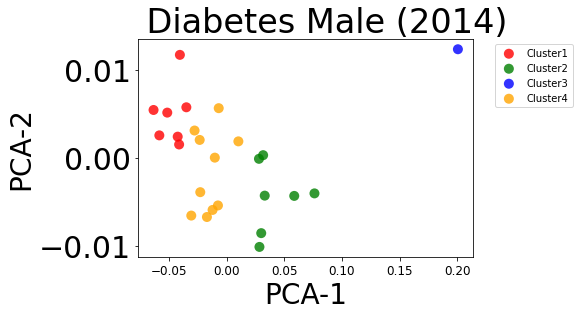

([[-0.05735090411417305], [-0.024974069266634046], [-0.05489568916595115], [-0.07138260910545807], [-0.031745324027766246], [-0.09225441067946029], [-0.0467778949912167], [-0.05171329368574619], [-0.054386529419152715], [-0.07010735472960031], [-0.07883879290642834]], [[0.0023956845020763956], [0.004761580718982901], [0.008318524738625616], [0.0020494919312815892], [0.0019259875221708095], [0.00380344394399812], [0.000530339271664572], [0.005176737330905284], [0.0013792347337460455], [0.0027437656112714428], [0.003942820357959592]])
([[0.010154594453667237], [0.03119217992992539], [0.023992705813031406], [0.004697834164022497], [0.038418512767643465], [0.00026810664412256155], [-0.006528707404264512], [-0.01018371476875878], [0.002866550680956884]], [[0.00243455061201711], [-0.000979719400122158], [-0.006664184053142153], [-0.005487337598230258], [-0.0060680308201208795], [-0.000369905548958614], [-0.008549944206805526], [-0.007525165624107882], [-0.006341477103666812]])
([[0.213640978

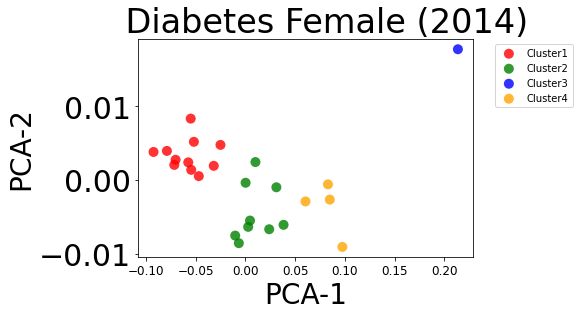

In [54]:
# Visulaize  Clusters 
title1 = '    Diabetes Male (2014)'
title2 = '    Diabetes Female (2014)'
xlabel = 'PCA-1'
ylabel = 'PCA-2'
plot_cluster(Diabetes_frame1_male,title1,xlabel,ylabel)
plot_cluster(Diabetes_frame1_female,title2,xlabel,ylabel)

## Cluste Labeling :- Diabetes Male
<a class="anchor" id="ClusteLabelingDiabetesCases"></a>
* Cluster 0 ------> Severity 1 Lower Prevelance
* Cluster 1 ------> Severity 2 Medium Prevelance
* Cluster 2 ------> Severity 3 Highest Prevelance
* Cluster 3 ------> Severity 0 Lowest Prevelance

## Cluste Labeling :- Diabetes Female
* Cluster 0 ------> Severity 1 Lower Prevelance
* Cluster 1 ------> Severity 2 Medium Prevelance
* Cluster 2 ------> Severity 3 Highest Prevelance
* Cluster 3 ------> Severity 0 Lowest Prevelance


In [100]:
data_diabetes_male = pd.DataFrame(np.array(Diabetes_data_male),columns=['Raised_diabetes','Raised_diabetes_more_95','Raised_diabetes_less_95','cluster'])
_,labeled_clus_diabetes_male = auto_labeler(data_diabetes_male,[-1,-1,-1])

data_diabetes_female= pd.DataFrame(np.array(Diabetes_data_female),columns=['Raised_diabetes','Raised_diabetes_more_95','Raised_diabetes_less_95','cluster'])
_,labeled_clus_diabetes_female = auto_labeler(data_diabetes_female,[-1,-1,-1])


Cluster Mean Values [[0.060256645234214985, 0.03350333662950432, 0.09603513842905652, 0.0], [0.10571566525817197, 0.05781055322489696, 0.16855026990977182, 1.0], [0.1965936544864349, 0.128437913333102, 0.280923396162734, 2.0], [0.07571675906989658, 0.04045285352744446, 0.12473213456015178, 3.0]]
3
Final Cumlative Cluster Scores[-0.18979512029277584, -0.33207648839284076, -0.6059549639822709, -0.24090174715749282]
Final Cumlative Cluster Scores sorted [-0.6059549639822709, -0.33207648839284076, -0.24090174715749282, -0.18979512029277584]
Labeled Cluster:- [2, 1, 3, 0]

Cluster Auto Labeling 

Cluster 2 ------> Sever-1Susceptibility


Cluster 1 ------> Sever-2Susceptibility


Cluster 3 ------> Sever-3Susceptibility


Cluster 0 ------> Sever-4Susceptibility


Cluster Mean Values [[0.04642026132387054, 0.025938427843676313, 0.0749202263927985, 0.0], [0.08049459898856363, 0.043064160396804024, 0.1320124921136302, 1.0], [0.196190961273289, 0.128861318022938, 0.2768971654608581, 2.0], [0.1195

<ipython-input-100-69f66073e7d7>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  data_diabetes_male = pd.DataFrame(np.array(Diabetes_data_male),columns=['Raised_diabetes','Raised_diabetes_more_95','Raised_diabetes_less_95','cluster'])
<ipython-input-100-69f66073e7d7>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  data_diabetes_female= pd.DataFrame(np.array(Diabetes_data_female),columns=['Raised_diabetes','Raised_diabetes_more_95','Raised_diabetes_less_95','cluster'])


## Tuber Culosis

<a class="anchor" id="TuberCulosis"></a>

In [57]:
## Check the List of Countries avaialable

## Columns renaming for Uniformity

#------------------------------------------------------------
Tuber_Culosis_Countires_Wise_complete = Tuber_Culosis_Countires_Wise
# TB Data 
Tuber_Culosis_Countires_Wise_complete = np.array(Tuber_Culosis_Countires_Wise_complete)
Tuber_Culosis_Countires_Wise_complete[:,[1,2]] = np.array(Tuber_Culosis_Countires_Wise_complete[:,[1,2]]).astype(int)
selected_countries = np.zeros(shape=(1,3)) 
data_tb = Tuber_Culosis_Countires_Wise_complete[:,[0,1,2]]
filter2 = []
for i in countries:
    filter2.clear()
    for j in range(0,len(data_tb[:,0])):
            if(data_tb[j,0] == i):
                filter2.append(True)
            else:
                filter2.append(False)
    Tuber_Culosis_Countires_Wise_complete = data_tb[filter2]
    for j in range(0,len(Tuber_Culosis_Countires_Wise_complete[:,0])):
                if(Tuber_Culosis_Countires_Wise_complete[j,0] == i):
                    val1 = ((sum(Tuber_Culosis_Countires_Wise_complete[:,1]))/len(Tuber_Culosis_Countires_Wise_complete[:,[1]]))
                    val2 = ((sum(Tuber_Culosis_Countires_Wise_complete[:,2]))/len(Tuber_Culosis_Countires_Wise_complete[:,[2]]))
                    selected_countries = np.append(selected_countries,[str(i),int(val1),int(val2)])
                    selected_countries = selected_countries.reshape((int(len(selected_countries)/3)),3)
                    break;
selected_countries   = selected_countries[1:,[0,1,2]]


if Verbose:
    print(selected_countries[:,[0,1,2]])

[['Afghanistan' '5122' '22528']
 ['Italy' '642' '3918']
 ['Kuwait' '175' '621']
 ['India' '274316' '1266364']
 ['South Africa' '58840' '176602']
 ['US' '6646' '17812']
 ['Bangladesh' '44240' '101729']
 ['Brazil' '19142' '78910']
 ['United Kingdom' '1158' '6938']
 ['Sri Lanka' '1759' '7708']
 ['Chile' '637' '4170']
 ['Norway' '65' '298']
 ['New Zealand' '67' '340']
 ['Switzerland' '129' '755']
 ['Ireland' '74' '522']
 ['Argentina' '2333' '12078']
 ['Australia' '260' '1113']
 ['Canada' '958' '1873']
 ['China' '147180' '536799']
 ['Slovenia' '59' '470']
 ['North Macedonia' '80' '409']
 ['Zimbabwe' '5858' '28703']
 ['Sweden' '122' '576']
 ['Netherlands' '194' '1256']
 ['Pakistan' '41400' '170037']]


In [58]:
clustering = KMeans(n_clusters=5, random_state=0).fit(selected_countries[:,[1,2]])
clustering.labels_
clus = list(clustering.labels_)
TB_frame = list(zip(countries,clus))
TB_frame1 = list(zip(selected_countries[:,[1]].tolist(),selected_countries[:,[2]].tolist(),clus))

if Debug:
    print(TB_frame)
    print("-------------------------cluster data wise---------------------------------------")
    print(TB_frame1)

[('Afghanistan', 0), ('Italy', 0), ('Kuwait', 0), ('India', 1), ('South Africa', 4), ('US', 0), ('Bangladesh', 3), ('Brazil', 3), ('United Kingdom', 0), ('Sri Lanka', 0), ('Chile', 0), ('Norway', 0), ('New Zealand', 0), ('Switzerland', 0), ('Ireland', 0), ('Argentina', 0), ('Australia', 0), ('Canada', 0), ('China', 2), ('Slovenia', 0), ('North Macedonia', 0), ('Zimbabwe', 0), ('Sweden', 0), ('Netherlands', 0), ('Pakistan', 4)]
-------------------------cluster data wise---------------------------------------
[(['5122'], ['22528'], 0), (['642'], ['3918'], 0), (['175'], ['621'], 0), (['274316'], ['1266364'], 1), (['58840'], ['176602'], 4), (['6646'], ['17812'], 0), (['44240'], ['101729'], 3), (['19142'], ['78910'], 3), (['1158'], ['6938'], 0), (['1759'], ['7708'], 0), (['637'], ['4170'], 0), (['65'], ['298'], 0), (['67'], ['340'], 0), (['129'], ['755'], 0), (['74'], ['522'], 0), (['2333'], ['12078'], 0), (['260'], ['1113'], 0), (['958'], ['1873'], 0), (['147180'], ['536799'], 2), (['59'],

In [59]:
## Dimensionality Reduction for clusters to plot Graphs in 2D

x = selected_countries[:,[1,2]]
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principleDf_Array = np.array(principalDf)
principleDf_Array[:,[0,1]].tolist()
TB_frame1 = list(zip(principleDf_Array[:,[0]].tolist(),principleDf_Array[:,[1]].tolist(),clus))

if Debug:
    TB_frame1



## Tuber Culosis Cluster Plot
<a class="anchor" id="TuberCulosisClusterPlot"></a>

([[-77585.76930954643], [-96725.46792990708], [-100044.38573587382], [-81850.5235032369], [-93665.96535621847], [-92782.54058424446], [-96480.7520769813], [-100383.67826565809], [-100342.26849351583], [-99923.80121892843], [-100163.19308677467], [-88393.39350528453], [-99545.74405087251], [-98650.71804674166], [-100217.2196145278], [-100272.09942218057], [-71400.24506353564], [-100099.95023673447], [-99420.78363762493]], [[-2311.398357936193], [-2584.229297822127], [-2313.8913662682007], [213.4984057747955], [-2745.7842469657808], [-2329.056911334104], [-2644.5878210546925], [-2350.079475262794], [-2357.3754173628145], [-2388.2645756452707], [-2390.6169380935294], [-2731.2557666996086], [-2339.2974674853576], [-1825.748587699282], [-2393.800379460826], [-2359.8856818800186], [-2952.9673737205485], [-2355.68354549004], [-2435.1614081564653]])
([[1194996.899858078]], [[-13569.935838731675]])
([[455342.5421019035]], [[23037.20517639977]])
([[8284.230818331296], [-19500.523039804935]], [[1

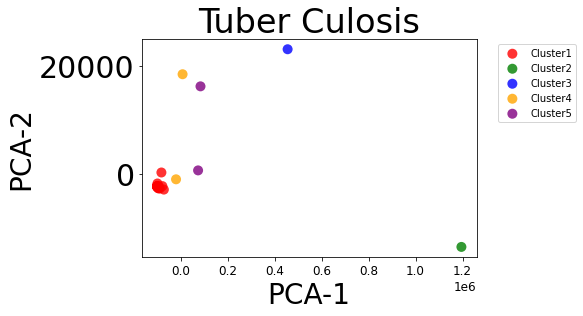

In [60]:
# Visulaize  Clusters 
title = 'Tuber Culosis'
xlabel = 'PCA-1'
ylabel = 'PCA-2'
plot_cluster(TB_frame1,title,xlabel,ylabel)

## Medical Expending
<a class="anchor" id="MedicalExpending"></a>

In [61]:
## Check the List of Countries avaialable

## Columns renaming for Uniformity

#------------------------------------------------------------
Medical_Expending_Countires_Wise_complete = Medical_Expending_Countires_Wise
# Medical Expending
Medical_Expending_Countires_Wise_complete = np.array(Medical_Expending_Countires_Wise_complete)
Medical_Expending_Countires_Wise_complete[:,[1,2,3]] = np.array(Medical_Expending_Countires_Wise_complete[:,[1,2,3]]).astype(int)
selected_countries = np.zeros(shape=(1,4)) 
data_ME = Medical_Expending_Countires_Wise_complete[:,[0,1,2,3]]
filter2 = []
for i in countries:
    filter2.clear()
    for j in range(0,len(data_ME[:,0])):
            if(data_ME[j,0] == i):
                filter2.append(True)
            else:
                filter2.append(False)
    Medical_Expending_Countires_Wise_complete = data_ME[filter2]
    for j in range(0,len(Medical_Expending_Countires_Wise_complete[:,0])):
                if(Medical_Expending_Countires_Wise_complete[j,0] == i):
                    val1 = ((sum(Medical_Expending_Countires_Wise_complete[:,1]))/len(Medical_Expending_Countires_Wise_complete[:,[1]]))
                    val2 = ((sum(Medical_Expending_Countires_Wise_complete[:,2]))/len(Medical_Expending_Countires_Wise_complete[:,[2]]))
                    val3 = ((sum(Medical_Expending_Countires_Wise_complete[:,3]))/len(Medical_Expending_Countires_Wise_complete[:,[3]]))
                    selected_countries = np.append(selected_countries,[str(i),int(val1),int(val2),int(val3)])
                    selected_countries = selected_countries.reshape((int(len(selected_countries)/4)),4)
                    break;
selected_countries   = selected_countries[1:,[0,1,2,3]]


if Verbose:
    print(selected_countries[:,[0,1,2,3]])

[['Afghanistan' '60' '61' '67']
 ['Italy' '2708' '2736' '2840']
 ['Kuwait' '1168' '1072' '1529']
 ['India' '58' '60' '69']
 ['South Africa' '470' '428' '499']
 ['US' '9538' '9941' '10246']
 ['Bangladesh' '31' '33' '36']
 ['Brazil' '776' '795' '928']
 ['United Kingdom' '4326' '3945' '3858']
 ['Sri Lanka' '151' '153' '159']
 ['Chile' '1140' '1190' '1381']
 ['Norway' '7565' '7496' '7936']
 ['New Zealand' '3582' '3745' '3937']
 ['Switzerland' '9807' '9835' '9956']
 ['Ireland' '4565' '4721' '4976']
 ['Argentina' '1305' '959' '1324']
 ['Australia' '4887' '4999' '5331']
 ['Canada' '4539' '4518' '4754']
 ['China' '392' '398' '440']
 ['Slovenia' '1775' '1834' '1920']
 ['North Macedonia' '306' '327' '328']
 ['Zimbabwe' '94' '98' '110']
 ['Sweden' '5623' '5707' '5904']
 ['Netherlands' '4674' '4753' '4911']
 ['Pakistan' '37' '41' '44']]


In [62]:
if Debug:
    countries

In [63]:
clustering = KMeans(n_clusters=6, random_state=0).fit(selected_countries[:,[1,2,3]])
clustering.labels_
clus = list(clustering.labels_)
medical_expend_frame = list(zip(countries,clus))
medical_expend_frame1 = list(zip(selected_countries[:,[1]].tolist(),selected_countries[:,[2]].tolist(),selected_countries[:,[3]].tolist(),clus))
medical_expend_frame1_data = medical_expend_frame1
if Debug:
    print(medical_expend_frame)
    print("-------------------------cluster data wise---------------------------------------")
    print(medical_expend_frame1)

[('Afghanistan', 5), ('Italy', 0), ('Kuwait', 1), ('India', 5), ('South Africa', 5), ('US', 2), ('Bangladesh', 5), ('Brazil', 1), ('United Kingdom', 0), ('Sri Lanka', 5), ('Chile', 1), ('Norway', 4), ('New Zealand', 0), ('Switzerland', 2), ('Ireland', 3), ('Argentina', 1), ('Australia', 3), ('Canada', 3), ('China', 5), ('Slovenia', 1), ('North Macedonia', 5), ('Zimbabwe', 5), ('Sweden', 3), ('Netherlands', 3), ('Pakistan', 5)]
-------------------------cluster data wise---------------------------------------
[(['60'], ['61'], ['67'], 5), (['2708'], ['2736'], ['2840'], 0), (['1168'], ['1072'], ['1529'], 1), (['58'], ['60'], ['69'], 5), (['470'], ['428'], ['499'], 5), (['9538'], ['9941'], ['10246'], 2), (['31'], ['33'], ['36'], 5), (['776'], ['795'], ['928'], 1), (['4326'], ['3945'], ['3858'], 0), (['151'], ['153'], ['159'], 5), (['1140'], ['1190'], ['1381'], 1), (['7565'], ['7496'], ['7936'], 4), (['3582'], ['3745'], ['3937'], 0), (['9807'], ['9835'], ['9956'], 2), (['4565'], ['4721'], [

In [64]:
## Dimensionality Reduction for clusters to plot Graphs in 2D

x = selected_countries[:,[1,2,3]]
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principleDf_Array = np.array(principalDf)
principleDf_Array[:,[0,1]].tolist()
medical_expend_frame1 = list(zip(principleDf_Array[:,[0]].tolist(),principleDf_Array[:,[1]].tolist(),clus))
if Debug:
    medical_expend_frame1


## Medical Expending Cluster Plot
<a class="anchor" id="MedicalExpendingClusterPlot"></a>

([[-134.36568990801723], [2078.3014929934448], [1588.4956058045263]], [[13.428044814654182], [478.9930542863807], [-116.64176887438869]])
([[-2737.728573551705], [-3473.6081757011507], [-2772.891053113948], [-2846.1444646699806], [-1724.6209486143414]], [[-179.46690518381993], [-55.00753259804221], [-105.56612054119064], [64.07654957068604], [-23.28160850990642]])
([[12249.543772987688], [12169.763302183981]], [[-192.5464856798502], [205.46927033844918]])
([[3319.8543731406326], [3871.613751484417], [3057.297115741612], [5033.975033979751], [3361.6624619743716]], [[-125.78266719335512], [-136.94331012579468], [12.149100941968037], [-5.301960203516983], [-2.7612332518271674]])
([[8362.094763372172]], [[-3.9281894939645507]])
([[-4809.457438873045], [-4809.98625657374], [-4111.209746809814], [-4860.283299254287], [-4650.697240708042], [-4207.439432375114], [-4363.067574286322], [-4743.540692747154], [-4847.56108647594]], [[22.53546618028019], [19.7527658802439], [21.241268699724717], [23

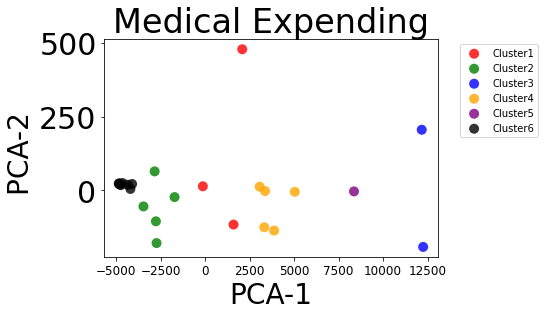

In [65]:
# Visulaize  Clusters 
title = 'Medical Expending'
xlabel = 'PCA-1'
ylabel = 'PCA-2 '
plot_cluster(medical_expend_frame1,title,xlabel,ylabel)

In [66]:
if Verbose:
    list(zip(selected_countries[:,[0]].tolist(),selected_countries[:,[2]].tolist(),selected_countries[:,[3]].tolist(),clus))

## Cluste Labeling :- Medical Expenditure
<a class="anchor" id="ClusteLabelingMedicalExpending"></a>
* Cluster 0 ------> Severity 0 Highest expending country 
* Cluster 1 ------> Severity 4 Lower  expending country
* Cluster 2 ------> Severity 2 High epending country  
* Cluster 3 ------> Severity 5 Lowest expending country
* Cluster 4 ------> Severity 1 upper medium expending country
* Cluster 5 ------> Severity 3 second Highest expending country 


In [67]:
data_Medical_expenditure = pd.DataFrame(np.array(medical_expend_frame1_data),columns=['2015_expenditure','2016_expenditure','20117_expenditure','cluster'])
_,labeled_clus_pop = auto_labeler(data_Medical_expenditure,[+1,+1,+1])

Cluster Mean Values [[3538.6666666666665, 3475.3333333333335, 3545.0, 0.0], [1232.8, 1170.0, 1416.4, 1.0], [9672.5, 9888.0, 10101.0, 2.0], [4857.6, 4939.6, 5175.2, 3.0], [7565.0, 7496.0, 7936.0, 4.0], [177.66666666666666, 177.66666666666666, 194.66666666666666, 5.0]]
3
Final Cumlative Cluster Scores[10559.0, 3819.2000000000003, 29661.5, 14972.400000000001, 22997.0, 550.0]
Final Cumlative Cluster Scores sorted [550.0, 3819.2000000000003, 10559.0, 14972.400000000001, 22997.0, 29661.5]
Labeled Cluster:- [5, 1, 0, 3, 4, 2]

Cluster Auto Labeling 

Cluster 5 ------> Sever-1Susceptibility


Cluster 1 ------> Sever-2Susceptibility


Cluster 0 ------> Sever-3Susceptibility


Cluster 3 ------> Sever-4Susceptibility


Cluster 4 ------> Sever-5Susceptibility


Cluster 2 ------> Seve-6Susceptibility




<ipython-input-67-10453c6c80e2>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  data_Medical_expenditure = pd.DataFrame(np.array(medical_expend_frame1_data),columns=['2015_expenditure','2016_expenditure','20117_expenditure','cluster'])


## Listing all the Clusters of Comorbidites

<a class="anchor" id="ListingalltheClustersofComorbidites"></a>

In [166]:
if Verbose:
    print("Covid-->\n")
    print(covid_frame)
    print("\nHIV-->\n")
    print(hiv_frame)
    print("\nDiabetes Male-->\n")
    print(Diabetes_frame_male)
    print("\nDiabetes Female-->\n")
    print(Diabetes_frame_female)
    print("\nBP Male-->\n")
    print(BP_frame_male)
    print("\nBP Female-->\n")
    print(BP_frame_female)
    print("\nTB-->\n")
    print(TB_frame)
    print("\nMedical-->\n")
    print(medical_expend_frame)
    print("\Age Group-->\n")
    print(age_frame)

Covid-->

[('Afghanistan', 0), ('Italy', 1), ('Kuwait', 1), ('India', 0), ('South Africa', 4), ('US', 5), ('Bangladesh', 0), ('Brazil', 1), ('United Kingdom', 2), ('Sri Lanka', 0), ('Chile', 1), ('Norway', 0), ('New Zealand', 0), ('Switzerland', 1), ('Ireland', 2), ('Argentina', 1), ('Australia', 0), ('Canada', 4), ('China', 0), ('Slovenia', 3), ('North Macedonia', 1), ('Zimbabwe', 0), ('Sweden', 2), ('Netherlands', 2), ('Pakistan', 0)]

HIV-->

[('Afghanistan', 0), ('Italy', 0), ('Kuwait', 0), ('India', 0), ('South Africa', 1), ('US', 0), ('Bangladesh', 0), ('Brazil', 0), ('United Kingdom', 0), ('Sri Lanka', 0), ('Chile', 0), ('Norway', 0), ('New Zealand', 0), ('Switzerland', 0), ('Ireland', 0), ('Argentina', 0), ('Australia', 0), ('Canada', 0), ('China', 0), ('Slovenia', 0), ('North Macedonia', 0), ('Zimbabwe', 0), ('Sweden', 0), ('Netherlands', 0), ('Pakistan', 0)]

Diabetes Male-->

[('Afghanistan', 1), ('Italy', 3), ('Kuwait', 2), ('India', 3), ('South Africa', 1), ('US', 3), ('Ba

# Main Cluster for Prediction

<a class="anchor" id="MainClusterforPrediction"></a>

## Main Mega Frame Formation
<a class="anchor" id="MainMegaFrameFormation"></a>

In [167]:
#final_frame = np.concatenate([covid_frame,hiv_frame,Diabetes_frame_male,Diabetes_frame_female,BP_frame_male,BP_frame_female,TB_frame,medical_expend_frame], axis=1)
# Excluded TB Data for now
final_frame = np.concatenate([covid_frame,hiv_frame,Diabetes_frame_male,Diabetes_frame_female,BP_frame_male,BP_frame_female,medical_expend_frame,age_frame], axis=1)
final_frame = final_frame[:,[0,1,3,5,7,9,11,13,15]]

if Debug:
    #TB_frame
    #covid_frame
    age_frame

## Ensuring Clusters Uniformity
<a class="anchor" id="EnsuringClustersUniformity"></a>

In [168]:
if Verbose:
    print(final_frame)

[['Afghanistan' '0' '0' '1' '3' '1' '3' '5' '0']
 ['Italy' '1' '0' '3' '0' '3' '2' '0' '0']
 ['Kuwait' '1' '0' '2' '2' '3' '2' '1' '0']
 ['India' '0' '0' '3' '1' '3' '1' '5' '1']
 ['South Africa' '4' '1' '1' '3' '3' '1' '5' '0']
 ['US' '5' '0' '3' '0' '2' '0' '2' '2']
 ['Bangladesh' '0' '0' '1' '1' '0' '1' '5' '2']
 ['Brazil' '1' '0' '3' '1' '3' '2' '1' '2']
 ['United Kingdom' '2' '0' '0' '0' '2' '0' '0' '0']
 ['Sri Lanka' '0' '0' '3' '1' '0' '1' '5' '0']
 ['Chile' '1' '0' '1' '3' '3' '2' '1' '0']
 ['Norway' '0' '0' '0' '0' '0' '0' '4' '0']
 ['New Zealand' '0' '0' '3' '0' '2' '0' '0' '0']
 ['Switzerland' '1' '0' '0' '0' '0' '0' '2' '0']
 ['Ireland' '2' '0' '3' '0' '0' '2' '3' '0']
 ['Argentina' '1' '0' '1' '1' '3' '2' '1' '0']
 ['Australia' '0' '0' '0' '0' '2' '0' '3' '0']
 ['Canada' '4' '0' '0' '0' '2' '0' '3' '0']
 ['China' '0' '0' '1' '1' '0' '2' '5' '3']
 ['Slovenia' '3' '0' '3' '1' '1' '1' '1' '0']
 ['North Macedonia' '1' '0' '3' '1' '1' '1' '5' '0']
 ['Zimbabwe' '0' '0' '3' '1' '

In [169]:
covid_frame_clus_weight = auto_weight_gen(labeled_clus_covid)#[0/5,5/5,1/5,4/5,3/5,2/5]
hiv_frame_clus_weight = auto_weight_gen(labeled_clus_hiv)#[0,1]
BP_frame__male_clus_weight = auto_weight_gen(labeled_clus_bp_male)#[1/3,2/3,0/3,3/3]
BP_frame__female_clus_weight = auto_weight_gen(labeled_clus_bp_female)#[0/3,2/3,3/3,1/3]
Diabetes_frame_male_clus_weight = auto_weight_gen(labeled_clus_diabetes_male)#[1/3,2/3,3/3,0/3]
Diabetes_frame_female_clus_weight = auto_weight_gen(labeled_clus_diabetes_female)#[1/3,2/3,3/3,0/3]
medical_expend_frame_clus_weight = auto_weight_gen(labeled_clus_pop)#[0/5,4/5,2/5,5/5,1/5,3/5]
age_frame_clus_weight = auto_weight_gen(labeled_clus_pop) #[0/3,2/3,1/3,3/3]
## Applying weights for the cluster values
for i in range(len(final_frame[:,0])):
    final_frame[:,1][i] = covid_frame_clus_weight[int(final_frame[:,1][i])]
    final_frame[:,2][i] = hiv_frame_clus_weight[int(final_frame[:,2][i])]
    final_frame[:,3][i] = BP_frame__male_clus_weight[int(final_frame[:,3][i])]
    final_frame[:,4][i] = BP_frame__female_clus_weight[int(final_frame[:,4][i])]
    final_frame[:,5][i] = Diabetes_frame_male_clus_weight[int(final_frame[:,5][i])]
    final_frame[:,6][i] = Diabetes_frame_female_clus_weight[int(final_frame[:,6][i])]
    final_frame[:,7][i] = medical_expend_frame_clus_weight[int(final_frame[:,7][i])]
    final_frame[:,7][i] = age_frame_clus_weight[int(final_frame[:,8][i])]

[1.0, 0.4, 0.2, 0.6, 0.8, 0.0]
[1.0, 0.0]
[0.6666666666666666, 0.0, 1.0, 0.3333333333333333]
[1.0, 0.3333333333333333, 0.6666666666666666, 0.0]
[1.0, 0.3333333333333333, 0.0, 0.6666666666666666]
[1.0, 0.6666666666666666, 0.0, 0.3333333333333333]
[0.4, 0.2, 1.0, 0.6, 0.8, 0.0]
[0.4, 0.2, 1.0, 0.6, 0.8, 0.0]


In [170]:
if Verbose:
    print(final_frame)

[['Afghanistan' '1.0' '1.0' '0.0' '0.0' '0.3333333333333'
  '0.3333333333333' '0.4' '0']
 ['Italy' '0.4' '1.0' '0.3333333333333' '1.0' '0.6666666666666' '0.0'
  '0.4' '0']
 ['Kuwait' '0.4' '1.0' '1.0' '0.6666666666666' '0.6666666666666' '0.0'
  '0.4' '0']
 ['India' '1.0' '1.0' '0.3333333333333' '0.3333333333333'
  '0.6666666666666' '0.6666666666666' '0.2' '1']
 ['South Africa' '0.8' '0.0' '0.0' '0.0' '0.6666666666666'
  '0.6666666666666' '0.4' '0']
 ['US' '0.0' '1.0' '0.3333333333333' '1.0' '0.0' '1.0' '1.0' '2']
 ['Bangladesh' '1.0' '1.0' '0.0' '0.3333333333333' '1.0'
  '0.6666666666666' '1.0' '2']
 ['Brazil' '0.4' '1.0' '0.3333333333333' '0.3333333333333'
  '0.6666666666666' '0.0' '1.0' '2']
 ['United Kingdom' '0.2' '1.0' '0.6666666666666' '1.0' '0.0' '1.0' '0.4'
  '0']
 ['Sri Lanka' '1.0' '1.0' '0.3333333333333' '0.3333333333333' '1.0'
  '0.6666666666666' '0.4' '0']
 ['Chile' '0.4' '1.0' '0.0' '0.0' '0.6666666666666' '0.0' '0.4' '0']
 ['Norway' '1.0' '1.0' '0.6666666666666' '1.0' '1

In [171]:
clustering = KMeans(n_clusters=5, random_state=0).fit(final_frame[:,[1,2,3,4,5,6,7,8]])
clustering.labels_
clus = list(clustering.labels_)
final_Clus_frame = list(zip(countries,clus))

final_Clus_frame1 = list(zip(final_frame[:,[0]].tolist(),final_frame[:,[1]].tolist(),final_frame[:,[2]].tolist(),clus))

final_Clus_frame1_data = list(zip(final_frame[:,[1]].tolist(),final_frame[:,[2]].tolist(),final_frame[:,[3]].tolist(),
                                  final_frame[:,[4]].tolist(),final_frame[:,[5]].tolist(),final_frame[:,[6]].tolist(),
                                  final_frame[:,[7]].tolist(),final_frame[:,[8]].tolist(),clus))

if Debug:
    print(final_Clus_frame)
    print(final_Clus_frame1)

[('Afghanistan', 3), ('Italy', 2), ('Kuwait', 2), ('India', 3), ('South Africa', 3), ('US', 1), ('Bangladesh', 1), ('Brazil', 1), ('United Kingdom', 0), ('Sri Lanka', 3), ('Chile', 3), ('Norway', 4), ('New Zealand', 0), ('Switzerland', 4), ('Ireland', 2), ('Argentina', 3), ('Australia', 0), ('Canada', 0), ('China', 1), ('Slovenia', 3), ('North Macedonia', 3), ('Zimbabwe', 3), ('Sweden', 4), ('Netherlands', 4), ('Pakistan', 1)]
[(['Afghanistan'], ['1.0'], ['1.0'], 3), (['Italy'], ['0.4'], ['1.0'], 2), (['Kuwait'], ['0.4'], ['1.0'], 2), (['India'], ['1.0'], ['1.0'], 3), (['South Africa'], ['0.8'], ['0.0'], 3), (['US'], ['0.0'], ['1.0'], 1), (['Bangladesh'], ['1.0'], ['1.0'], 1), (['Brazil'], ['0.4'], ['1.0'], 1), (['United Kingdom'], ['0.2'], ['1.0'], 0), (['Sri Lanka'], ['1.0'], ['1.0'], 3), (['Chile'], ['0.4'], ['1.0'], 3), (['Norway'], ['1.0'], ['1.0'], 4), (['New Zealand'], ['1.0'], ['1.0'], 0), (['Switzerland'], ['0.4'], ['1.0'], 4), (['Ireland'], ['0.2'], ['1.0'], 2), (['Argentina'

In [172]:
## Dimensionality Reduction for clusters to plot Graphs in 2D

x = final_frame[:,[1,2,3,4,5,6,7,8]]
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principleDf_Array = np.array(principalDf)
principleDf_Array[:,[0,1]].tolist()
final_Clus_frame1 = list(zip(principleDf_Array[:,[0]].tolist(),principleDf_Array[:,[1]].tolist(),clus))
if Debug:
    final_Clus_frame1

## Main Cluster Plot
<a class="anchor" id="MainClusterPlot"></a>

([[-0.7031886435907653], [-0.5919416176556684], [-0.6438780424293309], [-0.6587056927196895]], [[0.7117696006144297], [0.44784849598096244], [0.5589528793849272], [0.5971570596923028]])
([[1.3301479569762507], [1.6540232218542716], [1.6370774842605416], [2.6130818348005675], [1.7270437251774824]], [[1.2007976595659147], [0.04915671378308916], [-0.02634149408850111], [-0.1212879762821031], [-0.17962027847293674]])
([[-0.4679468185870384], [-0.5174214297524363], [-0.46869809948791474]], [[-0.1815143303935388], [-0.16268327645712463], [-0.22678234122904856]])
([[-0.26918410090622924], [0.4951784378378072], [-0.331549519131882], [-0.3941410290031024], [-0.25281567866758164], [-0.3072139170495079], [-0.45194906836278004], [-0.46677671865313847], [-0.3614423946723397]], [[-0.741548540521011], [-0.08488905537171382], [-0.702649867596389], [-0.40166716486102033], [-0.9027518524120279], [-0.6993741395405403], [-0.15831442196052378], [-0.12011024165314826], [-0.5105386353884186]])
([[-0.60164893

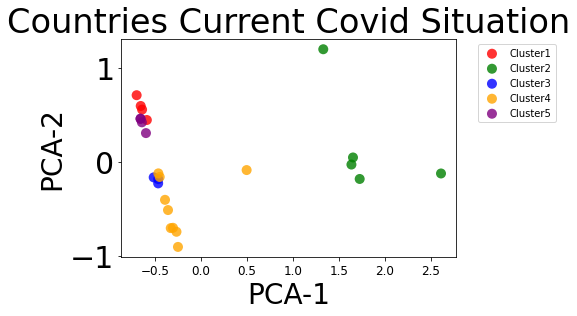

In [173]:
# Visulaize  Clusters 
title = 'Countries Current Covid Situation'
xlabel = 'PCA-1'
ylabel = 'PCA-2'
plot_cluster(final_Clus_frame1,title,xlabel,ylabel)

## Master Cluster Ordering
<a class="anchor" id="ClusteLabelingMainCluster"></a>
* Cluster 0 ------> Severity 0
* Cluster 1 ------> Severity 2 
* Cluster 2 ------> Severity 1 
* Cluster 3 ------> Severity 3
* Cluster 4 ------> Severity 4

In [174]:
# Auto Labeling
data_main_clus = pd.DataFrame(np.array(final_Clus_frame1_data),columns=['covid_frame','hiv_frame','Diabetes_frame_male','Diabetes_frame_female',
                                                            'BP_frame_male','BP_frame_female','medical_expend_frame','age_frame','cluster'])
_,labeled_clus_main_frame = auto_labeler(data_main_clus,[-1,-1,-1,-1,-1,-1,1,-1])

Cluster Mean Values [[0.75, 1.0, 0.583333333333275, 1.0, 0.0, 1.0, 0.4, 0.0, 0.0], [0.6799999999999999, 1.0, 0.13333333333332, 0.39999999999998, 0.59999999999998, 0.39999999999998, 0.9199999999999999, 2.2, 1.0], [0.3333333333333333, 1.0, 0.5555555555555333, 0.8888888888888666, 0.7777777777777333, 0.0, 0.4000000000000001, 0.0, 2.0], [0.7333333333333334, 0.8888888888888888, 0.18518518518516666, 0.2222222222222, 0.5925925925925445, 0.4444444444444, 0.3777777777777777, 0.1111111111111111, 3.0], [0.44999999999999996, 1.0, 0.6666666666666, 1.0, 1.0, 1.0, 0.4, 0.0, 4.0]]
8
Final Cumlative Cluster Scores[-3.9333333333332754, -4.49333333333326, -3.1555555555554666, -2.7999999999998666, -4.716666666666599]
Final Cumlative Cluster Scores sorted [-4.716666666666599, -4.49333333333326, -3.9333333333332754, -3.1555555555554666, -2.7999999999998666]
Labeled Cluster:- [4, 1, 0, 2, 3]

Cluster Auto Labeling 

Cluster 4 ------> Sever-1Susceptibility


Cluster 1 ------> Sever-2Susceptibility


Cluster 0 

<ipython-input-174-b2a4bc8397dd>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  data_main_clus = pd.DataFrame(np.array(final_Clus_frame1_data),columns=['covid_frame','hiv_frame','Diabetes_frame_male','Diabetes_frame_female',


# Preparing Data for Deep Net Model
<a class="anchor" id="PreparingDataforDeepNetModel"></a>

In [175]:
labels = pd.DataFrame(final_Clus_frame)
labels = labels[1]
Country_order = labels[0]

In [176]:
data = pd.DataFrame(final_frame[:,[1,2,3,4,5,6,7,8]])
Data_Label_Combined = pd.concat([data, labels], axis=1)
## Storing data into a Dataset Deep_Net_Data
Data_Label_Combined.to_csv('../DeepNet_Training_Data/Deep_Net_Data.csv')
#data
if Debug:
    Data_Label_Combined

In [177]:
## Loading Data into Data Loader
# create the dataset
dataset = CSVDataset('../DeepNet_Training_Data/Deep_Net_Data.csv')

train_loader = torch.utils.data.DataLoader(dataset,batch_size = 8 ,shuffle=False)
# # select rows from the dataset
# train, test = random_split(dataset, [[...], [...]])
# # create a data loader for train and test sets
# train_dl = DataLoader(train, batch_size=32, shuffle=True)
# test_dl = DataLoader(test, batch_size=1024, shuffle=False)

## Deep Net Model

<a class="anchor" id="DeepNetModel"></a>

In [178]:
# ## Deep Net Model Schema

# model = nn.Sequential(nn.Linear(10,64),
#                      nn.ReLU(),
#                      nn.Linear(64,1))   ## We need to improve this 

# ## Loss definition

# criterion = nn.CrossEntropyLoss()
# optimizer = optim.SGD(model.parameters(), lr=0.003)

# ## Training

# epochs = 5
# for e in range(epochs):
#     running_loss = 0
#     for dat,lab in train_loader:
        
    
#         # TODO: Training pass
#         optimizer.zero_grad()
        
#         output = model(dat)
#         loss = criterion(output, torch.max(lab,1)[1])
#         loss.backward()
#         optimizer.step()
        
#         running_loss += loss.item()
#     else:
#         print(f"Training loss: {running_loss/len(data)}")
        
# ## Prediction 
# with torch.no_grad():
#     predictions = model(data)

# print(predictions)

# Vaccine Dosage Prediction
<a class="anchor" id="VaccineDosagePrediction"></a>

## For Now 

### Severity 0 = 10%
### Severity 1 = 20%
### Severity 2 = 30%
### Severity 3 = 40%
### Severity 4 = 70%

# Minimum  Vaccine Dosage Requirment Calcualtion

In [179]:
final_Clus_frame = np.array(final_Clus_frame)

In [180]:
if Verbose:
    print("Labeld Main Frame Clusters " + str(labeled_clus_main_frame))

Labeld Main Frame Clusters [4, 1, 0, 2, 3]


In [181]:
Master_frame_clus_weight = auto_cluster_label(labeled_clus_main_frame)#[0,2,1,3,4]
# Master_frame_clus_weight = [0,2,1,3,4]



## Applying weights for the cluster values
for i in range(len(final_Clus_frame[:,0])):
    final_Clus_frame[:,1][i] = Master_frame_clus_weight[int(final_Clus_frame[:,1][i])]
    

[2, 1, 3, 4, 0]


In [182]:
final_Clus_frame = pd.DataFrame(final_Clus_frame)
lis1 = list(final_Clus_frame[0])
lis2 = list(final_Clus_frame[1])
final_Clus_frame = list(zip(lis1,lis2))

if Verbose:
    print(pd.DataFrame(final_Clus_frame))

                  0  1
0       Afghanistan  4
1             Italy  3
2            Kuwait  3
3             India  4
4      South Africa  4
5                US  1
6        Bangladesh  1
7            Brazil  1
8    United Kingdom  2
9         Sri Lanka  4
10            Chile  4
11           Norway  0
12      New Zealand  2
13      Switzerland  0
14          Ireland  3
15        Argentina  4
16        Australia  2
17           Canada  2
18            China  1
19         Slovenia  4
20  North Macedonia  4
21         Zimbabwe  4
22           Sweden  0
23      Netherlands  0
24         Pakistan  1


In [183]:
Population_Data_Countires_Wise_Descreet = Population_Data_Countires_Wise_Descreet.fillna(0)

if Verbose:
    print(Population_Data_Countires_Wise_Descreet)

     LocID                                       Country  VarID Variant  Time  \
0        4                                   Afghanistan      2  Medium  2020   
1      903                                        Africa      2  Medium  2020   
2     1823                                 African Group      2  Medium  2020   
3     1560                                 African Union      2  Medium  2020   
4     2080                 African Union: Central Africa      2  Medium  2020   
..     ...                                           ...    ...     ...   ...   
472    900                                         World      2  Medium  2020   
473   1801  World Bank Regional Groups (developing only)      2  Medium  2020   
474    887                                         Yemen      2  Medium  2020   
475    894                                        Zambia      2  Medium  2020   
476    716                                      Zimbabwe      2  Medium  2020   

     MidPeriod      PopMale

In [184]:
if Debug:
    print(set(Population_Data_Countires_Wise_Descreet['Country']))

{'Canada', 'Mayotte', 'Russian Federation', 'Sao Tome and Principe', 'UNICEF Regions: Latin America and Caribbean', 'ESCAP: income groups', 'Bolivarian Alliance for the Americas (ALBA)', 'Middle-income countries', 'Least developed: Latin America and the Caribbean', 'Chad', 'Upper-middle-income countries', 'Germany', 'Mexico', 'Norway', 'Belgium', 'Barbados', 'New Zealand', 'WHO: South-East Asia region (SEARO)', 'Peru', 'Less developed: Latin America and the Caribbean', 'Western Sahara', 'New Caledonia', 'Nauru', 'Falkland Islands (Malvinas)', 'UNICEF Programme Regions: Latin America', 'Saint Kitts and Nevis', 'Tajikistan', 'Uganda', 'United States Virgin Islands', 'African Union: Eastern Africa', 'Caribbean Community and Common Market (CARICOM)', 'Central America', 'Guinea', 'More developed: Northern America', 'Hungary', 'African Union: Western Africa', 'Greenland', 'Sweden', 'Réunion', 'ESCWA: Arab countries', 'Caribbean', 'South Sudan', 'Less developed regions, excluding least develo

In [185]:
Population_Data_Countires_Wise_complete = Population_Data_Countires_Wise_Descreet
# Covid Data 
Population_Data_Countires_Wise_complete = np.array(Population_Data_Countires_Wise_complete)
if Debug:
    Population_Data_Countires_Wise_complete[:,[6,7,8]]

In [186]:
Population_Data_Countires_Wise_complete = Population_Data_Countires_Wise_Descreet
# Covid Data 
Population_Data_Countires_Wise_complete = np.array(Population_Data_Countires_Wise_complete)
Population_Data_Countires_Wise_complete[:,[6,7,8]] = np.array(Population_Data_Countires_Wise_complete[:,[6,7,8]]).astype(int)
selected_countries = np.zeros(shape=(1,4)) 
data_pop = Population_Data_Countires_Wise_complete
filter3 = []
for i in countries:
    filter3.clear()
    for j in range(0,len(data_pop[:,0])):
            if(data_pop[j,1] == i):
                filter3.append(True)
            else:
                filter3.append(False)
    Population_Data_Countires_Wise_complete = data_pop[filter3]
    for j in range(0,len(Population_Data_Countires_Wise_complete[:,0])):
                if(Population_Data_Countires_Wise_complete[j,1] == i):
                    val1 = ((sum(Population_Data_Countires_Wise_complete[:,6]))/len(Population_Data_Countires_Wise_complete[:,[6]]))
                    val2 = ((sum(Population_Data_Countires_Wise_complete[:,7]))/len(Population_Data_Countires_Wise_complete[:,[7]]))
                    val3 = ((sum(Population_Data_Countires_Wise_complete[:,8]))/len(Population_Data_Countires_Wise_complete[:,[8]]))
                    selected_countries = np.append(selected_countries,[str(i),int(val1),int(val2),int(val3)])
                    selected_countries = selected_countries.reshape((int(len(selected_countries)/4)),4)
                    break;
selected_countries   = selected_countries[1:,[0,1,2,3]]


if Verbose:
    print(selected_countries)

[['Afghanistan' '19976' '18952' '38928']
 ['Italy' '29437' '31024' '60461']
 ['Kuwait' '2614' '1656' '4270']
 ['India' '717100' '662903' '1380004']
 ['South Africa' '29216' '30092' '59308']
 ['US' '163786' '167216' '331002']
 ['Bangladesh' '83259' '81430' '164689']
 ['Brazil' '104435' '108123' '212559']
 ['United Kingdom' '33542' '34343' '67886']
 ['Sri Lanka' '10267' '11145' '21413']
 ['Chile' '9425' '9690' '19116']
 ['Norway' '2739' '2681' '5421']
 ['New Zealand' '2370' '2452' '4822']
 ['Switzerland' '4293' '4360' '8654']
 ['Ireland' '2451' '2486' '4937']
 ['Argentina' '22049' '23146' '45195']
 ['Australia' '12698' '12801' '25499']
 ['Canada' '18732' '19009' '37742']
 ['China' '738247' '701076' '1439323']
 ['Slovenia' '1035' '1043' '2078']
 ['North Macedonia' '1042' '1041' '2083']
 ['Zimbabwe' '7092' '7770' '14862']
 ['Sweden' '5058' '5040' '10099']
 ['Netherlands' '8537' '8597' '17134']
 ['Pakistan' '113672' '107220' '220892']]


In [187]:
final_Clus_frame = np.concatenate([final_Clus_frame,selected_countries], axis=1)

In [188]:
if Debug:
    print(selected_countries)

[['Afghanistan' '19976' '18952' '38928']
 ['Italy' '29437' '31024' '60461']
 ['Kuwait' '2614' '1656' '4270']
 ['India' '717100' '662903' '1380004']
 ['South Africa' '29216' '30092' '59308']
 ['US' '163786' '167216' '331002']
 ['Bangladesh' '83259' '81430' '164689']
 ['Brazil' '104435' '108123' '212559']
 ['United Kingdom' '33542' '34343' '67886']
 ['Sri Lanka' '10267' '11145' '21413']
 ['Chile' '9425' '9690' '19116']
 ['Norway' '2739' '2681' '5421']
 ['New Zealand' '2370' '2452' '4822']
 ['Switzerland' '4293' '4360' '8654']
 ['Ireland' '2451' '2486' '4937']
 ['Argentina' '22049' '23146' '45195']
 ['Australia' '12698' '12801' '25499']
 ['Canada' '18732' '19009' '37742']
 ['China' '738247' '701076' '1439323']
 ['Slovenia' '1035' '1043' '2078']
 ['North Macedonia' '1042' '1041' '2083']
 ['Zimbabwe' '7092' '7770' '14862']
 ['Sweden' '5058' '5040' '10099']
 ['Netherlands' '8537' '8597' '17134']
 ['Pakistan' '113672' '107220' '220892']]


In [189]:
final_Clus_frame = final_Clus_frame[:,[0,1,3,4,5]]
if Debug:
    print(final_Clus_frame)

[['Afghanistan' '4' '19976' '18952' '38928']
 ['Italy' '3' '29437' '31024' '60461']
 ['Kuwait' '3' '2614' '1656' '4270']
 ['India' '4' '717100' '662903' '1380004']
 ['South Africa' '4' '29216' '30092' '59308']
 ['US' '1' '163786' '167216' '331002']
 ['Bangladesh' '1' '83259' '81430' '164689']
 ['Brazil' '1' '104435' '108123' '212559']
 ['United Kingdom' '2' '33542' '34343' '67886']
 ['Sri Lanka' '4' '10267' '11145' '21413']
 ['Chile' '4' '9425' '9690' '19116']
 ['Norway' '0' '2739' '2681' '5421']
 ['New Zealand' '2' '2370' '2452' '4822']
 ['Switzerland' '0' '4293' '4360' '8654']
 ['Ireland' '3' '2451' '2486' '4937']
 ['Argentina' '4' '22049' '23146' '45195']
 ['Australia' '2' '12698' '12801' '25499']
 ['Canada' '2' '18732' '19009' '37742']
 ['China' '1' '738247' '701076' '1439323']
 ['Slovenia' '4' '1035' '1043' '2078']
 ['North Macedonia' '4' '1042' '1041' '2083']
 ['Zimbabwe' '4' '7092' '7770' '14862']
 ['Sweden' '0' '5058' '5040' '10099']
 ['Netherlands' '0' '8537' '8597' '17134']
 

In [190]:
final_Clus_frame

array([['Afghanistan', '4', '19976', '18952', '38928'],
       ['Italy', '3', '29437', '31024', '60461'],
       ['Kuwait', '3', '2614', '1656', '4270'],
       ['India', '4', '717100', '662903', '1380004'],
       ['South Africa', '4', '29216', '30092', '59308'],
       ['US', '1', '163786', '167216', '331002'],
       ['Bangladesh', '1', '83259', '81430', '164689'],
       ['Brazil', '1', '104435', '108123', '212559'],
       ['United Kingdom', '2', '33542', '34343', '67886'],
       ['Sri Lanka', '4', '10267', '11145', '21413'],
       ['Chile', '4', '9425', '9690', '19116'],
       ['Norway', '0', '2739', '2681', '5421'],
       ['New Zealand', '2', '2370', '2452', '4822'],
       ['Switzerland', '0', '4293', '4360', '8654'],
       ['Ireland', '3', '2451', '2486', '4937'],
       ['Argentina', '4', '22049', '23146', '45195'],
       ['Australia', '2', '12698', '12801', '25499'],
       ['Canada', '2', '18732', '19009', '37742'],
       ['China', '1', '738247', '701076', '1439323']

In [191]:
M_Vaccine_dosage = []
F_Vaccine_dosage = []
T_Vaccine_dosage = []
Percent_Pop_Vac = []
Country_Category = []
Country_Category_int = []


for i in final_Clus_frame:
    if int(i[1]) == 0:
        M_Vaccine_dosage.append(int(i[2])*0.1)
        F_Vaccine_dosage.append(int(i[3])*0.1)
        T_Vaccine_dosage.append(int(i[4])*0.1)
        Percent_Pop_Vac.append(int(10))
        Country_Category.append("Low Impact")
        Country_Category_int.append(0)
    
    elif int(i[1]) == 1:
        M_Vaccine_dosage.append(int(i[2])*0.2)
        F_Vaccine_dosage.append(int(i[3])*0.2)
        T_Vaccine_dosage.append(int(i[4])*0.2)
        Percent_Pop_Vac.append(int(20))
        Country_Category.append("Moderate Impact")
        Country_Category_int.append(1)

        
    elif int(i[1]) == 2:
        M_Vaccine_dosage.append(int(i[2])*0.3)
        F_Vaccine_dosage.append(int(i[3])*0.3)
        T_Vaccine_dosage.append(int(i[4])*0.3)
        Percent_Pop_Vac.append(int(30))
        Country_Category.append("High Impact")
        Country_Category_int.append(2)
      
    elif int(i[1]) == 3:
        M_Vaccine_dosage.append(int(i[2])*0.4)
        F_Vaccine_dosage.append(int(i[3])*0.4)
        T_Vaccine_dosage.append(int(i[4])*0.4)
        Percent_Pop_Vac.append(int(40))
        Country_Category.append("Severe Impact")
        Country_Category_int.append(3)
    
        
    elif int(i[1]) == 4:
        M_Vaccine_dosage.append(int(i[2])*0.7)
        F_Vaccine_dosage.append(int(i[3])*0.7)
        T_Vaccine_dosage.append(int(i[4])*0.7)
        Percent_Pop_Vac.append(int(70))
        Country_Category.append("Critical Impact")
        Country_Category_int.append(4)



        

In [192]:
final_Clus_dataframe = pd.DataFrame(final_Clus_frame , 
columns=['Country','Cluster','Male_Populstion','Female_Population','Total_Population'])

final_Clus_dataframe['Min_Covid_Vaccine_for_Male'] = M_Vaccine_dosage
final_Clus_dataframe['Min_Covid_Vaccine_for_Female'] = F_Vaccine_dosage
final_Clus_dataframe['Min_Covid_Vaccine_for_total'] = T_Vaccine_dosage
final_Clus_dataframe['Percent_Pop_Vac'] = Percent_Pop_Vac
final_Clus_dataframe['Vulnerability'] = Country_Category
final_Clus_dataframe['Vulnerability_int'] = Country_Category_int

#if Debug:
    
print(M_Vaccine_dosage)

print(F_Vaccine_dosage) 

print(T_Vaccine_dosage)

print(Percent_Pop_Vac)

print(Country_Category)

#if Verbose:
final_Clus_dataframe








[13983.199999999999, 11774.800000000001, 1045.6000000000001, 501969.99999999994, 20451.199999999997, 32757.2, 16651.8, 20887.0, 10062.6, 7186.9, 6597.5, 273.90000000000003, 711.0, 429.3, 980.4000000000001, 15434.3, 3809.3999999999996, 5619.599999999999, 147649.4, 724.5, 729.4, 4964.4, 505.8, 853.7, 22734.4]
[13266.4, 12409.6, 662.4000000000001, 464032.1, 21064.399999999998, 33443.200000000004, 16286.0, 21624.600000000002, 10302.9, 7801.499999999999, 6783.0, 268.1, 735.6, 436.0, 994.4000000000001, 16202.199999999999, 3840.2999999999997, 5702.7, 140215.2, 730.0999999999999, 728.6999999999999, 5439.0, 504.0, 859.7, 21444.0]
[27249.6, 24184.4, 1708.0, 966002.7999999999, 41515.6, 66200.40000000001, 32937.8, 42511.8, 20365.8, 14989.099999999999, 13381.199999999999, 542.1, 1446.6, 865.4000000000001, 1974.8000000000002, 31636.499999999996, 7649.7, 11322.6, 287864.60000000003, 1454.6, 1458.1, 10403.4, 1009.9000000000001, 1713.4, 44178.4]
[70, 40, 40, 70, 70, 20, 20, 20, 30, 70, 70, 10, 30, 10, 

,Country,Cluster,Male_Populstion,Female_Population,Total_Population,Min_Covid_Vaccine_for_Male,Min_Covid_Vaccine_for_Female,Min_Covid_Vaccine_for_total,Percent_Pop_Vac,Vulnerability,Vulnerability_int
0,Afghanistan,4,19976,18952,38928,13983.2,13266.4,27249.6,70,Critical Impact,4
1,Italy,3,29437,31024,60461,11774.8,12409.6,24184.4,40,Severe Impact,3
2,Kuwait,3,2614,1656,4270,1045.6,662.4,1708.0,40,Severe Impact,3
3,India,4,717100,662903,1380004,501970.0,464032.1,966002.8,70,Critical Impact,4
4,South Africa,4,29216,30092,59308,20451.2,21064.4,41515.6,70,Critical Impact,4
5,US,1,163786,167216,331002,32757.2,33443.2,66200.4,20,Moderate Impact,1
6,Bangladesh,1,83259,81430,164689,16651.8,16286.0,32937.8,20,Moderate Impact,1
7,Brazil,1,104435,108123,212559,20887.0,21624.6,42511.8,20,Moderate Impact,1
8,United Kingdom,2,33542,34343,67886,10062.6,10302.9,20365.8,30,High Impact,2
9,Sri Lanka,4,10267,11145,21413,7186.9,7801.5,14989.1,70,Critical Impact,4


##  Writing the cleaned data in Cleaned Folder

In [193]:
final_Clus_dataframe.to_csv('../final_Cluster_frame.csv')

## Minimum Covid Vaccine Required Plot
<a class="anchor" id="MinimumCovidVaccineRequiredPlot"></a>

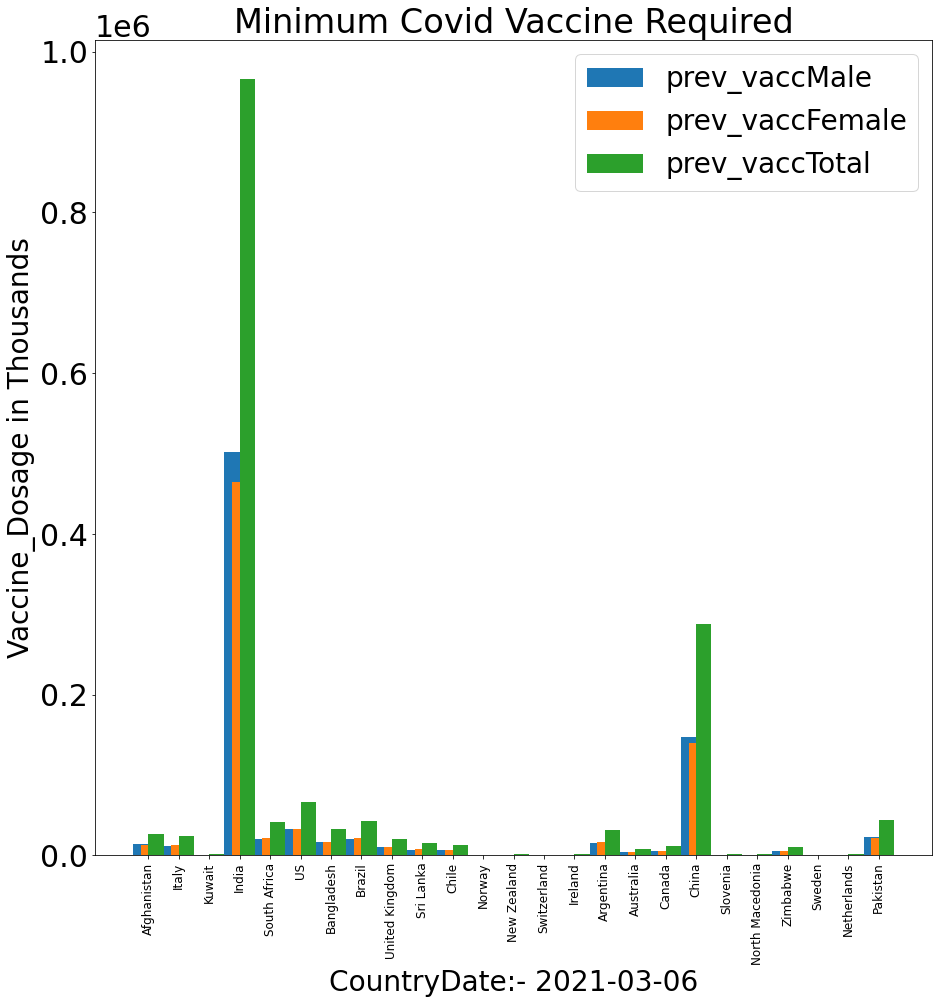

In [194]:
## Visualisation # 1
ylab = "Vaccine_Dosage in Thousands"
xlab ="Country" + "Date:- " + Latest_date


df = final_Clus_dataframe
            

labels = df['Country']
prev_vaccMale = df['Min_Covid_Vaccine_for_Male']
prev_vaccFemale = df['Min_Covid_Vaccine_for_Female']
prev_vaccTotal = df['Min_Covid_Vaccine_for_total']
        
title1 = 'Minimum Covid Vaccine Required'
         
#high = int(max(prev_2018))
#low = 0  

x = np.arange(len(labels))  # the x label locations 
width = .50  # the width of the bars
fig, ax = plt.subplots(figsize=(15,15))
rects1 = ax.bar(x-width/2, prev_vaccMale, width, label='prev_vaccMale')
rects2 = ax.bar(x, prev_vaccFemale, width, label='prev_vaccFemale')
rects3 = ax.bar(x+width/2, prev_vaccTotal, width, label='prev_vaccTotal')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(ylab)
ax.set_xlabel(xlab)
ax.set_title(title1)
ax.set_xticks(x)
#ax.set_yticks(y)
plt.xticks(rotation=90) 
#plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])
ax.set_xticklabels(labels)
ax.legend()

    
    
plt.show()

## Minimum Percentage Vaccine Required Plot
<a class="anchor" id="MinimumPercentageVaccineRequiredPlot"></a>

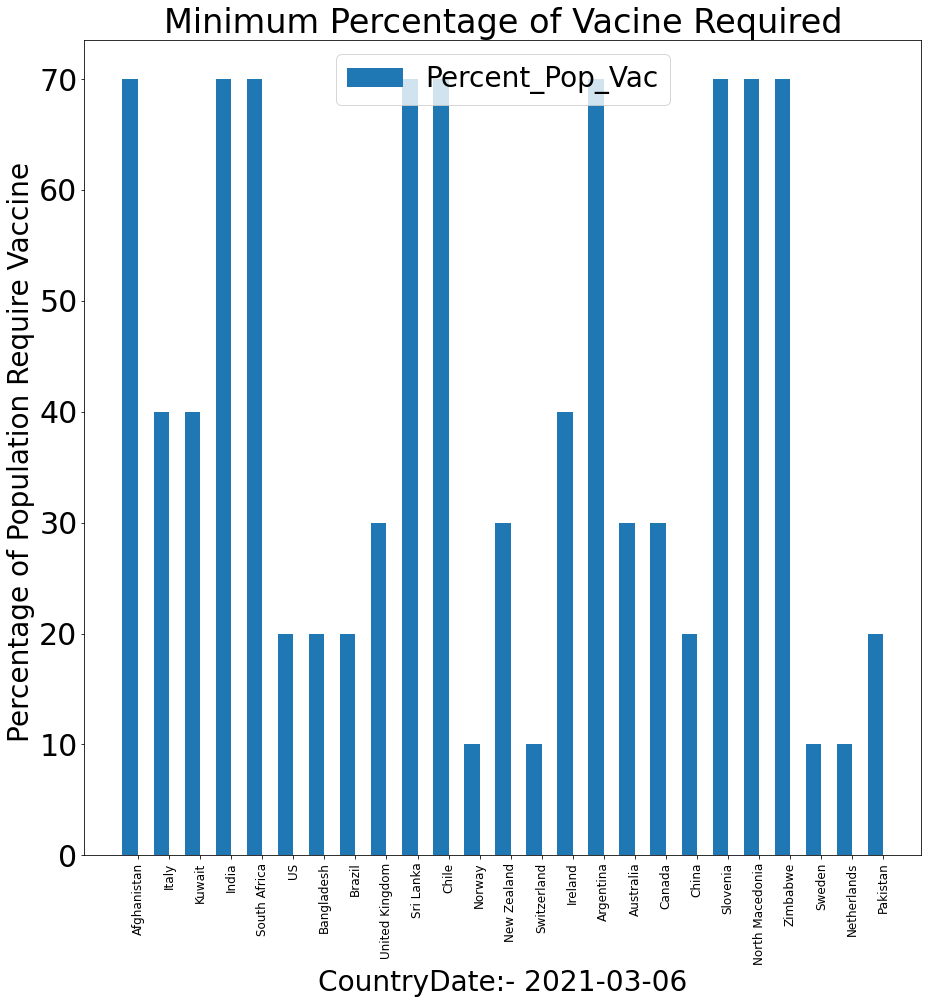

In [195]:
## Visualisation # 2
ylab = "Percentage of Population Require Vaccine "
xlab = "Country" + "Date:- " + Latest_date


df = final_Clus_dataframe
            

labels = df['Country']
prev_vaccMale = df['Percent_Pop_Vac']
        
title1 = 'Minimum Percentage of Vacine Required'
         
#high = int(max(prev_2018))
#low = 0  

x = np.arange(len(labels))  # the x label locations 
width = .50  # the width of the bars
fig, ax = plt.subplots(figsize=(15,15))
rects1 = ax.bar(x-width/2, prev_vaccMale, width, label='Percent_Pop_Vac')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(ylab)
ax.set_xlabel(xlab)
ax.set_title(title1)
ax.set_xticks(x)
#ax.set_yticks(y)
plt.xticks(rotation=90) 
#plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])
ax.set_xticklabels(labels)
ax.legend()

    
    
plt.show()

## Countries Covid Vulnerability Status Plot
<a class="anchor" id="CountriesCovidVulnerabilityStatusPlot"></a>

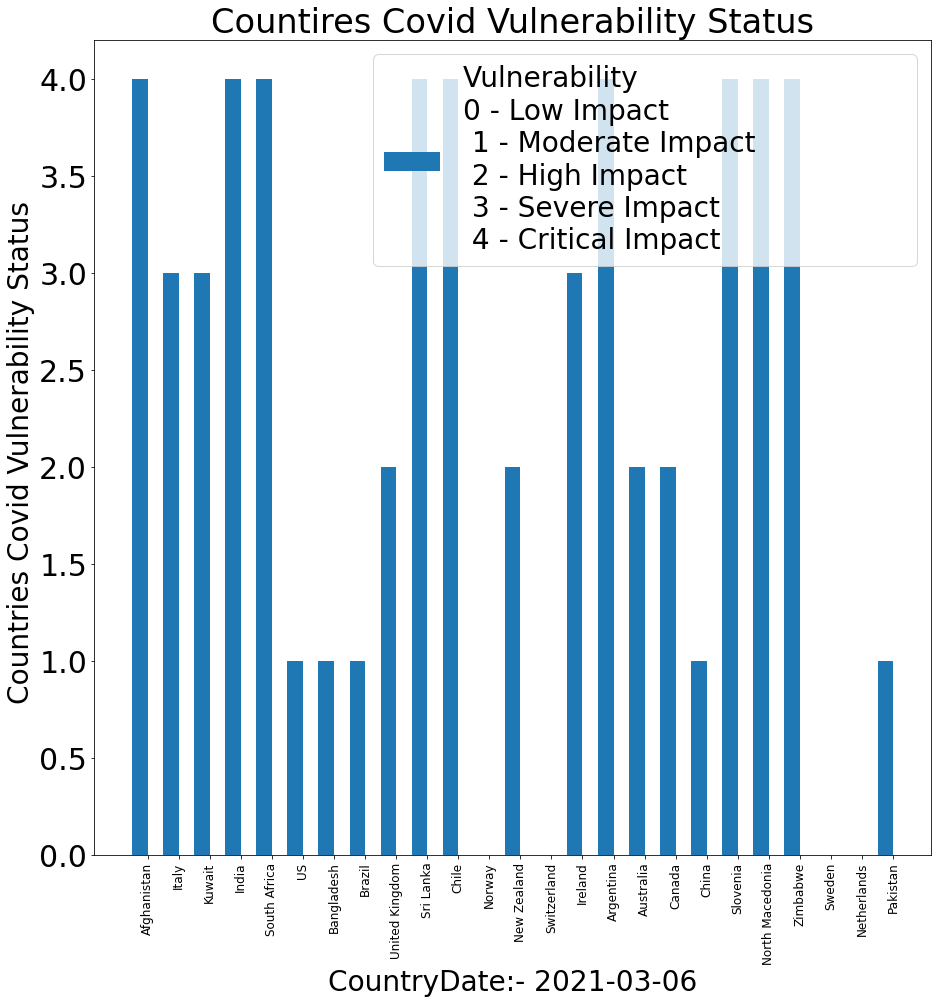

In [196]:
## Visualisation # 3
ylab = "Countries Covid Vulnerability Status "
xlab = "Country" + "Date:- " + Latest_date


df = final_Clus_dataframe
            

labels = df['Country']
prev_vaccMale = df['Vulnerability_int']
        
title1 = 'Countires Covid Vulnerability Status'
         
#high = int(max(prev_2018))
#low = 0  

x = np.arange(len(labels))  # the x label locations 
width = .50  # the width of the bars
fig, ax = plt.subplots(figsize=(15,15))
#rects1 = ax.bar(x-width/2, prev_vaccMale, width, label='Vulnerability')
rects1 = ax.bar(x-width/2, prev_vaccMale, width, label='Vulnerability \n0 - Low Impact \n 1 - Moderate Impact \
                \n 2 - High Impact \n 3 - Severe Impact \n 4 - Critical Impact')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(ylab)
ax.set_xlabel(xlab)
ax.set_title(title1)
ax.set_xticks(x)
#ax.set_yticks(y)
plt.xticks(rotation=90) 
#plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])
ax.set_xticklabels(labels)
ax.legend()

    
    
plt.show()

## Points to Discuss
<a class="anchor" id="discuss"></a>

* Should we Take Present Data or Average for covid values
* Clusters Labeling Automation